In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import pearsonr
from flexitext import flexitext
import matplotlib.pyplot as plt


# Homemade functions

In [2]:

def plot_correlations_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Add annotations to the first plot. 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the second plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=.07, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=.07, y=-2.3, fontsize=12)

    # Add annotations to the third plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fourth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the fifth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[6][0], 4)) + "; p-value: " + str(round(comedy_corr[6][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[6][0], 4)) + "; p-value: " + str(round(horror_corr[6][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)

    # Add annotations to the sixth plot.
    comedy_cor_string = "C r= " + str(round(comedy_corr[7][0], 4)) + "; p-value: " + str(round(comedy_corr[7][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[7][0], 4)) + "; p-value: " + str(round(horror_corr[7][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=.03, y=-2, fontsize=12)
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=.03, y=-2.3, fontsize=12)



In [3]:

def plot_correlations2_bothTrailers(dataset_df, type, comedy_corr, horror_corr, title):
    
    # Define ROI labels. 
    NAcc_label = "NAcc_" + type
    AIns_label = "AIns_" + type
    MPFC_label = "MPFC_" + type

    whole_both_trailers_plot = sns.pairplot(
        dataset_df,
        kind="reg",
        x_vars=[NAcc_label, AIns_label, MPFC_label],
        y_vars=["Narrow_rank_W1", "Narrow_rank_M1"], 
        hue="Type",
        palette="viridis", 
        #scatter_kws = {"s":3} try to change the size of the dots
        height=5,
        aspect=1.2)
    
    whole_both_trailers_plot.fig.suptitle(title, y=1.03, fontsize=20, fontweight ="bold")
    plt.rc('legend', fontsize=25, title_fontsize=28, markerscale=2)

    # Calculate coordinates for plotting. 
    NAcc_x_coord = np.mean(dataset_df[NAcc_label].max() + np.abs(dataset_df[NAcc_label].min())) * -0.15
    AIns_x_coord = np.mean(dataset_df[AIns_label].max() + np.abs(dataset_df[AIns_label].min())) * -0.15
    MPFC_x_coord = np.mean(dataset_df[MPFC_label].max() + np.abs(dataset_df[MPFC_label].min())) * -0.15

    FW_y_coord_comedy = 1 #(dataset_df["Narrow_rank_W1"].max() - dataset_df["Narrow_rank_W1"].min()) * 0.05 
    FW_y_coord_horror = 2 #(dataset_df["Narrow_rank_W1"].max() - dataset_df["Narrow_rank_W1"].min()) * 0.001 

    FM_y_coord_comedy = 1 #(dataset_df["Narrow_rank_M1"].max() - dataset_df["Narrow_rank_M1"].min()) * 0.07
    FM_y_coord_horror = 2 #(dataset_df["Narrow_rank_M1"].max() - dataset_df["Narrow_rank_M1"].min()) * 0.01

    # Add annotations to the first plot (NAcc-Gross_US_W1_num). 
    comedy_cor_string = "C r= " + str(round(comedy_corr[0][0], 4)) + "; p-value: " + str(round(comedy_corr[0][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[0][0], 4)) + "; p-value: " + str(round(horror_corr[0][1], 5))
    whole_both_trailers_plot.axes[0, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=FW_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=FW_y_coord_horror-0.1, fontsize=12,  weight='bold')
    whole_both_trailers_plot.axes[0, 0].set_ylabel('Gross First Week', fontsize = 12, weight='bold')
    whole_both_trailers_plot.axes[0, 0].set_ylim([0, dataset_df["Narrow_rank_W1"].max()+1])

    # Add annotations to the second plot (NAcc-Gross_US_M1).
    comedy_cor_string = "C r= " + str(round(comedy_corr[1][0], 4)) + "; p-value: " + str(round(comedy_corr[1][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[1][0], 4)) + "; p-value: " + str(round(horror_corr[1][1], 5))
    whole_both_trailers_plot.axes[1, 0].text(s=horror_cor_string, x=NAcc_x_coord, y=FM_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].text(s=comedy_cor_string, x=NAcc_x_coord, y=FM_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].set_ylabel('Gross First Month', fontsize = 12, weight='bold')
    whole_both_trailers_plot.axes[1, 0].set_ylim([0, dataset_df["Narrow_rank_M1"].max()+1])

    # Add annotations to the fourth plot (AIns-Gross_US_W1_num).
    comedy_cor_string = "C r= " + str(round(comedy_corr[2][0], 4)) + "; p-value: " + str(round(comedy_corr[2][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[2][0], 4)) + "; p-value: " + str(round(horror_corr[2][1], 5))
    whole_both_trailers_plot.axes[0, 1].text(s=horror_cor_string, x=AIns_x_coord, y=FW_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=FW_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 1].set_ylim([0, dataset_df["Narrow_rank_W1"].max()+1])

    # Add annotations to the fifth plot (AIns-Gross_US_M1).
    comedy_cor_string = "C r= " + str(round(comedy_corr[3][0], 4)) + "; p-value: " + str(round(comedy_corr[3][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[3][0], 4)) + "; p-value: " + str(round(horror_corr[3][1], 5))
    whole_both_trailers_plot.axes[1, 1].text(s=horror_cor_string, x=AIns_x_coord, y=FM_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 1].text(s=comedy_cor_string, x=AIns_x_coord, y=FM_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 1].set_ylim([0, dataset_df["Narrow_rank_M1"].max()+1])

    # Add annotations to the seventh plot (MPFC-Gross_US_W1_num).
    comedy_cor_string = "C r= " + str(round(comedy_corr[4][0], 4)) + "; p-value: " + str(round(comedy_corr[4][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[4][0], 4)) + "; p-value: " + str(round(horror_corr[4][1], 5))
    whole_both_trailers_plot.axes[0, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=FW_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=FW_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[0, 2].set_ylim([0, dataset_df["Narrow_rank_W1"].max()+1])

    # Add annotations to the eighth plot (MPFC-Gross_US_M1).
    comedy_cor_string = "C r= " + str(round(comedy_corr[5][0], 4)) + "; p-value: " + str(round(comedy_corr[5][1], 5))
    horror_cor_string = "H r= " + str(round(horror_corr[5][0], 4)) + "; p-value: " + str(round(horror_corr[5][1], 5))
    whole_both_trailers_plot.axes[1, 2].text(s=horror_cor_string, x=MPFC_x_coord, y=FM_y_coord_comedy, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 2].text(s=comedy_cor_string, x=MPFC_x_coord, y=FM_y_coord_horror-0.1, fontsize=12, weight='bold')
    whole_both_trailers_plot.axes[1, 2].set_ylim([0, dataset_df["Narrow_rank_M1"].max()+1])

    # Path to save the plot.
    save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/AggregateChoice/Correlations_Aggregate_" + type 
    whole_both_trailers_plot.savefig(save_path + ".png", dpi=300, bbox_inches="tight")

#compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "whole", "Correlations for whole activation for both types of trailers")




In [4]:
# Fuction to create scatter plots with corr.
def plot_correlations(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.regplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green")
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [5]:
# Fuction to create scatter plots with corr.
def plot_correlations_2trailers(data_df, correlations_list, type_of_signal, title_fig):

    fig, ax = plt.subplots(3, 3, figsize=(30, 30))

    NAcc_label = "NAcc_" + type_of_signal 
    AIns_label = "AIns_" + type_of_signal
    MPFC_label = "MPFC_" + type_of_signal

    # NAcc and positive arousal
    Nacc_pa_plot = sns.relplot(data=data_df, x=NAcc_label, y="Pos_arousal_scaled", hue="Type", ax=ax[0, 0])
    title1 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Positive arousal</>" 
    flexitext(0.2, 1.035, title1, va="top", ax=ax[0, 0])
    r_value1 = "<weight:bold, size:15>r=" + str(round(correlations_list[0][0], 5)) + "; p-value: "+ str(round(correlations_list[0][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value1, ha="center", ax=ax[0, 0])

    # NAcc and negative arousal
    NAcc_na_plot = sns.regplot(data=data_df, x=NAcc_label, y="Neg_arousal_scaled", ax=ax[1, 0])
    title2 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Negative arousal</>"
    flexitext(0.2, 1.035, title2, va="top", ax=ax[1, 0])
    r_value2 = "<weight:bold, size:15>r=" + str(round(correlations_list[1][0], 5)) + "; p-value: "+ str(round(correlations_list[1][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value2, ha="center", ax=ax[1, 0])

    # NAcc and watch score
    NAcc_wa_plot = sns.regplot(data=data_df, x=NAcc_label, y="W_score_scaled", ax=ax[2, 0])
    title3 = "<size:15>Corr <color:blue>" + NAcc_label + "</> and Watch score</>"
    flexitext(0.2, 1.035, title3, va="top", ax=ax[2, 0])
    r_value3 = "<weight:bold, size:15>r=" + str(round(correlations_list[2][0], 5)) + "; p-value: "+ str(round(correlations_list[2][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value3, ha="center", ax=ax[2, 0])

    # AIns and positive arousal
    AIns_pa_plot = sns.regplot(data=data_df, x=AIns_label, y="Pos_arousal_scaled", ax=ax[0, 1], color="red")
    title4 = "<size:15>Corr <color:red>AIns</> and Positive arousal</>"
    flexitext(0.2, 1.035, title4, va="top", ax=ax[0, 1])
    r_value4 = "<weight:bold, size:15>r=" + str(round(correlations_list[3][0], 5)) + "; p-value: "+str(round(correlations_list[3][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value4, ha="center", ax=ax[0, 1])

    # AIns and negative arousal
    AIns_na_plot = sns.regplot(data=data_df, x=AIns_label, y="Neg_arousal_scaled", ax=ax[1, 1], color="red")
    title5 = "<size:15>Corr <color:red>AIns</> and Negative arousal</>"
    flexitext(0.2, 1.035, title5, va="top", ax=ax[1, 1])
    r_value5 = "<weight:bold, size:15>r=" + str(round(correlations_list[4][0], 5)) + "; p-value: "+str(round(correlations_list[4][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value5, ha="center", ax=ax[1, 1])

    # AIns and watch score
    AIns_wa_plot = sns.regplot(data=data_df, x=AIns_label, y="W_score_scaled", ax=ax[2, 1], color="red")
    title6 = "<size:15>Corr <color:red>AIns</> and Watch score</>"
    flexitext(0.2, 1.035, title6, va="top", ax=ax[2, 1])
    r_value6 = "<weight:bold, size:15>r=" + str(round(correlations_list[5][0], 5)) + "; p-value: "+str(round(correlations_list[5][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value6, ha="center", ax=ax[2, 1])

    # MPFC and positive arousal
    MPFC_pa_plot = sns.regplot(data=data_df, x=MPFC_label, y="Pos_arousal_scaled", ax=ax[0, 2], color="green")
    title7 = "<size:15>Corr <color:green>MPFC</> and Positive arousal</>"
    flexitext(0.2, 1.035, title7, va="top", ax=ax[0, 2])
    r_value7 = "<weight:bold, size:15>r=" + str(round(correlations_list[6][0], 5)) + "; p-value: "+str(round(correlations_list[6][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value7, ha="center", ax=ax[0, 2])

    # MPFC and negative arousal
    MPFC_na_plot = sns.regplot(data=data_df, x=MPFC_label, y="Neg_arousal_scaled", ax=ax[1, 2], color="green")
    title8 = "<size:15>Corr <color:green>MPFC</> and Negative arousal</>"
    flexitext(0.2, 1.035, title8, va="top", ax=ax[1, 2])   
    r_value8 = "<weight:bold, size:15>r=" + str(round(correlations_list[7][0], 5)) + "; p-value: "+str(round(correlations_list[7][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value8, ha="center", ax=ax[1, 2])
    
    # MPFC and watch score
    MPFC_wa_plot = sns.regplot(data=data_df, x=MPFC_label, y="W_score_scaled", ax=ax[2, 2], color="green", logistic=True)
    title9 = "<size:15>Corr <color:green>MPFC</> and Watch score</>"
    flexitext(0.2, 1.035, title9, va="top", ax=ax[2, 2])
    r_value9 = "<weight:bold, size:15>r=" + str(round(correlations_list[8][0], 5)) + "; p-value: "+str(round(correlations_list[8][1], 7)) +"</>"
    flexitext(0.65, 0.9, r_value9, ha="center", ax=ax[2, 2])

    # Set the title of the figure
    #fig.suptitle(title_fig, fontsize=20, fontweight ="bold")
    fig_title = "<weight:bold, size:20>" + title_fig + "</>"
    flexitext(0.5, 1.1, fig_title, ha="center", va="top", ax=ax[0, 1])

    plt.show()

In [6]:
def compute_and_plot_corrs(dataframe, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    PA_key = "Pos_arousal_scaled" 
    NA_key = "Neg_arousal_scaled" 
    W_key = "W_score_scaled" 

    #Compute PA correlations
    NAcc_PA_corr = pearsonr(dataframe[NAcc_key], dataframe[PA_key])
    AIns_PA_corr = pearsonr(dataframe[AIns_key], dataframe[PA_key])
    MPFC_PA_corr = pearsonr(dataframe[MPFC_key], dataframe[PA_key])

    #Compute NA correlations
    NAcc_NA_corr = pearsonr(dataframe[NAcc_key], dataframe[NA_key])
    AIns_NA_corr = pearsonr(dataframe[AIns_key], dataframe[NA_key])
    MPFC_NA_corr = pearsonr(dataframe[MPFC_key], dataframe[NA_key])

    #Compute W correlations
    NAcc_W_corr = pearsonr(dataframe[NAcc_key], dataframe[W_key])
    AIns_W_corr = pearsonr(dataframe[AIns_key], dataframe[W_key])
    MPFC_W_corr = pearsonr(dataframe[MPFC_key], dataframe[W_key])

    #Create a list with all the correlations
    corrs = [NAcc_PA_corr, NAcc_NA_corr, NAcc_W_corr, AIns_PA_corr, AIns_NA_corr, AIns_W_corr, MPFC_PA_corr, MPFC_NA_corr, MPFC_W_corr]

    # Print the correlations results.
    print("The correlation between " + str(NAcc_key) + " activation and positive arousal is: " + str(round(NAcc_PA_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and positive arousal is: " + str(round(AIns_PA_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and positive arousal is: " + str(round(MPFC_PA_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and negative arousal is: " + str(round(NAcc_NA_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and negative arousal is: " + str(round(AIns_NA_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and negative arousal is: " + str(round(MPFC_NA_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and watch scores is: " + str(round(NAcc_W_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and watch scores is: " + str(round(AIns_W_corr[0], 5)) + " with a p-value of: " + str((AIns_W_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and watch scores is: " + str(round(MPFC_W_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_corr[1])))

    plot_correlations(dataframe, corrs, signal, title)

In [7]:
def compute_and_plot_both_corrs(dataframe_main, dataframe_C, dataframe_H, signal, title):

    NAcc_key = "NAcc_" + signal
    AIns_key = "AIns_" + signal
    MPFC_key = "MPFC_" + signal

    FW_key = "Narrow_rank_W1" #"Gross_US_W1_num" 
    FM_key = "Narrow_rank_M1" #"Gross_US_M1" 

    # Compute FW correlations for Comedy trailers.
    NAcc_FW_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[FW_key])
    AIns_FW_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[FW_key])
    MPFC_FW_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[FW_key])

    # Compute FW correlations for Horror trailers.
    NAcc_FW_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[FW_key])
    AIns_FW_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[FW_key])
    MPFC_FW_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[FW_key])

    # Compute FM correlations for Comedy trailers.
    NAcc_FM_comedy_corr = pearsonr(dataframe_C[NAcc_key], dataframe_C[FM_key])
    AIns_FM_comedy_corr = pearsonr(dataframe_C[AIns_key], dataframe_C[FM_key])
    MPFC_FM_comedy_corr = pearsonr(dataframe_C[MPFC_key], dataframe_C[FM_key])

    # Compute FM correlations for Horror trailers.
    NAcc_FM_horror_corr = pearsonr(dataframe_H[NAcc_key], dataframe_H[FM_key])
    AIns_FM_horror_corr = pearsonr(dataframe_H[AIns_key], dataframe_H[FM_key])
    MPFC_FM_horror_corr = pearsonr(dataframe_H[MPFC_key], dataframe_H[FM_key])

    # Create a list with all the correlations for Comedy trailers.
    corrs_comedy = [NAcc_FW_comedy_corr, NAcc_FM_comedy_corr, AIns_FW_comedy_corr, AIns_FM_comedy_corr, MPFC_FW_comedy_corr, MPFC_FM_comedy_corr]

    # Create a list with all the correlations for Horror trailers.
    corrs_horror = [NAcc_FW_horror_corr, NAcc_FM_horror_corr, AIns_FW_horror_corr, AIns_FM_horror_corr, MPFC_FW_horror_corr, MPFC_FM_horror_corr]
    
    #corrs_horror = [NAcc_PA_horror_corr, NAcc_NA_horror_corr, AIns_PA_horror_corr, AIns_NA_horror_corr, MPFC_PA_horror_corr, MPFC_NA_horror_corr]
    
    # Print the correlations results for Comedy trailers.
    print("The correlation between " + str(NAcc_key) + " activation and first week gross for Comedy trailers is: " + str(round(NAcc_FW_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_FW_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first week gross for Comedy trailers is: " + str(round(AIns_FW_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_FW_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first week gross for Comedy trailers is: " + str(round(MPFC_FW_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_FW_comedy_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and first month gross for Comedy trailers is: " + str(round(NAcc_FM_comedy_corr[0], 5)) + " with a p-value of: " + str((NAcc_FM_comedy_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first month gross for Comedy trailers is: " + str(round(AIns_FM_comedy_corr[0], 5)) + " with a p-value of: " + str((AIns_FM_comedy_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first month gross for Comedy trailers is: " + str(round(MPFC_FM_comedy_corr[0], 5)) + " with a p-value of: " + str((MPFC_FM_comedy_corr[1])))

    # Print the correlations results for Horror trailers.
    print("\nThe correlation between " + str(NAcc_key) + " activation and first week gross for Horror trailers is: " + str(round(NAcc_FW_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_FW_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first week gross for Horror trailers is: " + str(round(AIns_FW_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_FW_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first week gross for Horror trailers is: " + str(round(MPFC_FW_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_FW_horror_corr[1])))

    print("\nThe correlation between " + str(NAcc_key) + " activation and first month gross for Horror trailers is: " + str(round(NAcc_FM_horror_corr[0], 5)) + " with a p-value of: " + str((NAcc_FM_horror_corr[1])))
    print("The correlation between " + str(AIns_key) + " activation and first month gross for Horror trailers is: " + str(round(AIns_FM_horror_corr[0], 5)) + " with a p-value of: " + str((AIns_FM_horror_corr[1])))
    print("The correlation between " + str(MPFC_key) + " activation and first month gross for Horror trailers is: " + str(round(MPFC_FM_horror_corr[0], 5)) + " with a p-value of: " + str((MPFC_FM_horror_corr[1])))

    # Plot the correlations for both types of trailers.
    plot_correlations2_bothTrailers(dataframe_main, signal, corrs_comedy, corrs_horror, title)

# Clean data

In [8]:
# Open a datasets directory. 
fd = os.open("/Users/luisalvarez/Documents/GitHub", os.O_RDONLY)

# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

Current working dir : /Users/luisalvarez/Documents/GitHub


In [9]:
# Open csv file. 
Aggregate_data_df = pd.read_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv')

# Create ranked values.
Aggregate_data_df["GrossOverTheaters_W1"] = Aggregate_data_df["Gross_US_W1_num"] / Aggregate_data_df["Theaters_US_W1_num"]
Aggregate_data_df["GrossOverTheaters_M1"] = Aggregate_data_df["Gross_US_M1"] / Aggregate_data_df["Theaters_US_M1"]

# Create ranks column 
# Broad rank refers to ranking across both types of trailer, 
# Narrow ranking means ranking by each type of trailers.  
Aggregate_data_df["Broad_rank_W1"] = Aggregate_data_df["GrossOverTheaters_W1"].rank(method='max')
Aggregate_data_df["Broad_rank_M1"] = Aggregate_data_df["GrossOverTheaters_M1"].rank(method='max')

# Not sure if this is the best way to do it....
Aggregate_data_df["Narrow_rank_W1"] = Aggregate_data_df.groupby("Type")["GrossOverTheaters_W1"].rank(method='max')
Aggregate_data_df["Narrow_rank_M1"] = Aggregate_data_df.groupby("Type")["GrossOverTheaters_M1"].rank(method='max')

# Separate df into comedy and horror.
Aggregate_data_comedy_df = Aggregate_data_df[Aggregate_data_df["Type"] == "comedy"]
Aggregate_data_horror_df = Aggregate_data_df[Aggregate_data_df["Type"] == "horror"]

#Aggregate_data_df.to_csv("RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv", index=False)

print("The un-cleaned shape of the dataframe is: ", Aggregate_data_df.shape)
Aggregate_data_df.head(30)

The un-cleaned shape of the dataframe is:  (30, 67)


,Trailer,Type,Pos_arousal,Neg_arousal,Pos_arousal_scaled,Neg_arousal_scaled,W_score,W_score_scaled,NAcc_onset,AIns_onset,...,Weeks_avg_per_theater,Gross_World_num,Gross_US_M1,Theaters_US_M1,GrossOverTheaters_W1,GrossOverTheaters_M1,Broad_rank_W1,Broad_rank_M1,Narrow_rank_W1,Narrow_rank_M1
0,rc1,comedy,1.778694,-0.320190,0.364480,-0.320190,3.107143,0.866071,0.029611,-0.116781,...,2.0,15518636.0,12897789.0,6041.0,2851.771986,2135.042046,8.0,10.0,6.0,7.0
1,rc10,comedy,1.543847,-0.304939,0.129634,-0.304939,2.481481,0.229167,-0.046373,-0.115710,...,3.0,13021859.0,12660865.0,8478.0,2380.966929,1493.378745,5.0,3.0,3.0,2.0
2,rc11,comedy,1.437143,-0.355509,0.022929,-0.355509,2.035714,-0.276786,0.023168,0.073072,...,4.0,39126983.0,26897765.0,11880.0,3800.442466,2264.121633,14.0,14.0,9.0,9.0
3,rc12,comedy,1.327725,-0.287918,-0.086488,-0.287918,1.888889,-0.428241,-0.098935,-0.098037,...,3.0,17657217.0,11681574.0,6161.0,2728.933847,1896.051615,7.0,7.0,5.0,4.0
4,rc2,comedy,1.328290,-0.268451,-0.085923,-0.268451,1.896552,-0.409483,-0.014134,-0.070817,...,4.0,40384027.0,37473383.0,13367.0,4849.094581,2803.425077,16.0,15.0,11.0,10.0
5,rc3,comedy,1.523302,-0.324938,0.109088,-0.324938,2.740741,0.495370,0.049353,0.066683,...,6.0,108641148.0,39302864.0,8245.0,21370.000000,4766.872529,28.0,22.0,15.0,13.0
6,rc4,comedy,1.825153,-0.369021,0.410939,-0.369021,3.250000,1.008929,-0.000217,-0.005031,...,11.0,485252376.0,92969975.0,16232.0,1491.046909,5727.573620,2.0,25.0,1.0,14.0
7,rc5,comedy,1.587900,-0.183105,0.173686,-0.183105,2.571429,0.276786,0.018259,0.064336,...,4.0,35958110.0,23236435.0,10441.0,3560.729134,2225.498994,12.0,13.0,8.0,8.0
8,rc6,comedy,1.399011,-0.224754,-0.015202,-0.224754,2.310345,0.004310,-0.079126,0.009850,...,3.0,19115227.0,15199130.0,9107.0,2495.018152,1668.950258,6.0,5.0,4.0,3.0
9,rc7,comedy,1.443221,-0.461644,0.029007,-0.461644,2.142857,-0.098214,0.052734,0.042732,...,3.0,29121628.0,17274770.0,8742.0,2886.322691,1976.066118,9.0,8.0,7.0,5.0


In [10]:
Aggregate_data_df["Gross_US_W1_num"] = np.log(Aggregate_data_df["Gross_US_W1_num"])
Aggregate_data_df["Gross_US_M1"] = np.log(Aggregate_data_df["Gross_US_M1"])

In [11]:


# drop_threshold = 3.0 #2.4

# # Drop outliers from NAcc.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_whole_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_whole_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_onset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_onset_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_middle_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_middle_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_offset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_offset_z"] > -drop_threshold]
# print("The shape of the dataframe after dropping 'NAcc' outliers is: ", all_subs_events_df.shape)

# # Drop outliers from AIns.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_whole_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_whole_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_onset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_onset_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_middle_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_middle_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_offset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["AIns_offset_z"] > -drop_threshold]
# print("The shape of the dataframe after dropping 'AIns' outliers is: ", all_subs_events_df.shape)

# # Drop outliers from MPFC.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_whole_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_whole_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_onset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_onset_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_middle_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_middle_z"] > -drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_offset_z"] < drop_threshold]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_offset_z"] > -drop_threshold]
# print("The shape of the dataframe after dropping 'MPFC' outliers is: ", all_subs_events_df.shape)

# # Drop outliers from negative arousal.
# all_subs_events_df = all_subs_events_df[all_subs_events_df["Neg_arousal_scaled"] < 1.5]
# print("The shape of the dataframe after dropping 'negative arousal' outliers is: ", all_subs_events_df.shape)

# # Drop other outliers outliers. 
# all_subs_events_df = all_subs_events_df[all_subs_events_df["NAcc_middle"] > -0.6]
# all_subs_events_df = all_subs_events_df[all_subs_events_df["MPFC_middle"] < 1.2]


In [12]:

"""
# Separate files based on type of trailer. 
all_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]
all_subs_events_horror.reset_index(drop=True, inplace=True)
all_subs_events_horror.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Horror.csv')

all_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]
all_subs_events_comedy.reset_index(drop=True, inplace=True)
all_subs_events_comedy.to_csv('RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Comedy.csv')
"""



'\n# Separate files based on type of trailer. \nall_subs_events_horror = all_subs_events_df[all_subs_events_df["Type"] == "Horror"]\nall_subs_events_horror.reset_index(drop=True, inplace=True)\nall_subs_events_horror.to_csv(\'RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Horror.csv\')\n\nall_subs_events_comedy = all_subs_events_df[all_subs_events_df["Type"] == "Comedy"]\nall_subs_events_comedy.reset_index(drop=True, inplace=True)\nall_subs_events_comedy.to_csv(\'RM_Thesis_Neuroforecasting/ProcessedData/AllSubs_NeuralActivation_Comedy.csv\')\n'

# Visualize distribution of data 

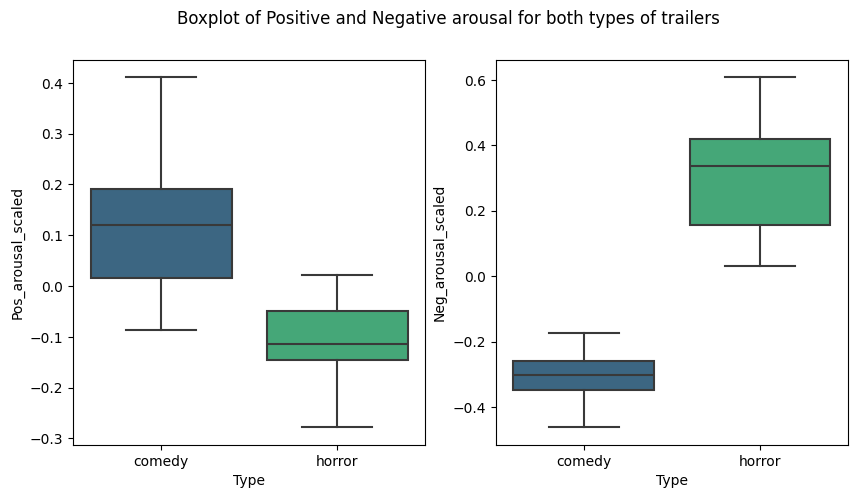

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
fig.suptitle("Boxplot of Positive and Negative arousal for both types of trailers")
sns.boxplot(data=Aggregate_data_df, y="Pos_arousal_scaled", x="Type", palette="viridis", ax=axs[0])
sns.boxplot(data=Aggregate_data_df, y="Neg_arousal_scaled", x="Type", palette="viridis", ax=axs[1])

save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/AggregateChoice/BoxOffice_PNarousal"
fig.savefig(save_path + ".png", dpi=300, bbox_inches="tight")


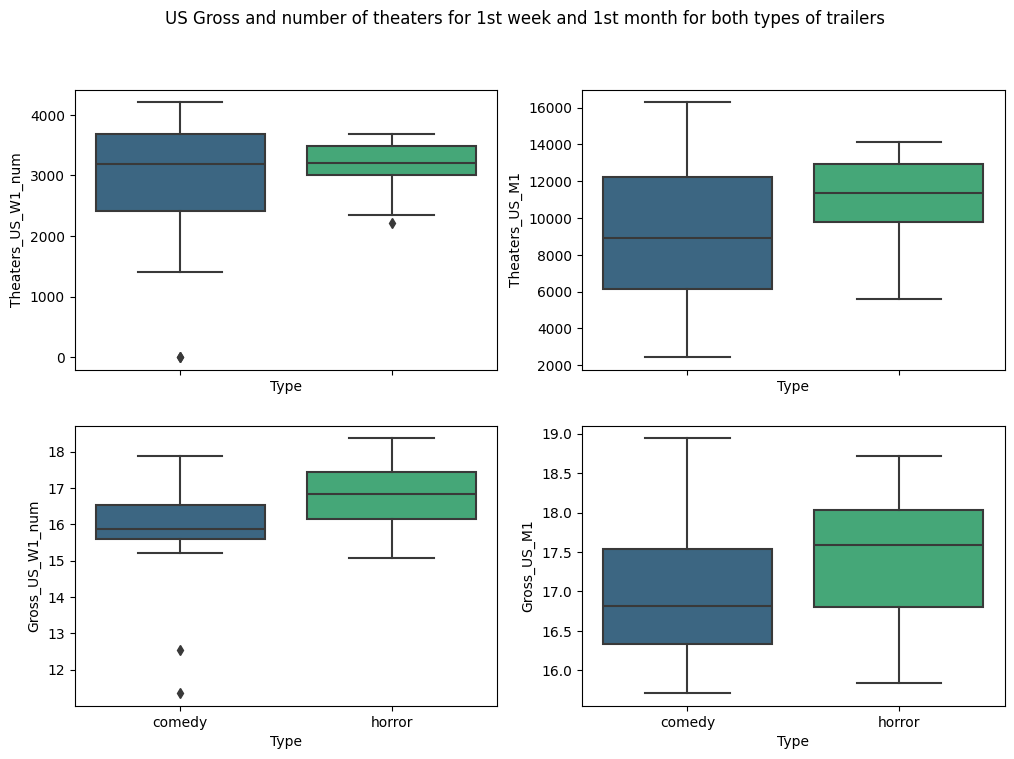

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

fig.suptitle("US Gross and number of theaters for 1st week and 1st month for both types of trailers")
sns.boxplot(data=Aggregate_data_df, y="Theaters_US_W1_num", x="Type", palette="viridis", ax=axs[0, 0])
sns.boxplot(data=Aggregate_data_df, y="Theaters_US_M1", x="Type", palette="viridis", ax=axs[0, 1])
sns.boxplot(data=Aggregate_data_df, y="Gross_US_W1_num", x="Type", palette="viridis", ax=axs[1, 0])
sns.boxplot(data=Aggregate_data_df, y="Gross_US_M1", x="Type", palette="viridis", ax=axs[1, 1])

save_path = "/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/Figures/AggregateChoice/BoxOffice_ByType"
fig.savefig(save_path + ".png", dpi=300, bbox_inches="tight")


The correlation between GrossOverTheaters_W1 and Pos_arousal is: -0.0526 with a p-value of: 0.7826103319706393
The correlation between GrossOverTheaters_W1 and Neg_arousal is: -0.0927 with a p-value of: 0.6260036579676731

The correlation between GrossOverTheaters_M1 and Pos_arousal is: 0.057 with a p-value of: 0.7646455275031556
The correlation between GrossOverTheaters_M1 and Neg_arousal is: 0.02 with a p-value of: 0.9165921245650879

The correlation between Narrow_rank_W1 and Pos_arousal is: -0.0533 with a p-value of: 0.779812854675194
The correlation between Narrow_rank_W1 and Neg_arousal is: -0.1765 with a p-value of: 0.3509390730115636

The correlation between Narrow_rank_M1 and Pos_arousal is: 0.186 with a p-value of: 0.3250172770939893
The correlation between Narrow_rank_M1 and Neg_arousal is: -0.1974 with a p-value of: 0.29574319945979344


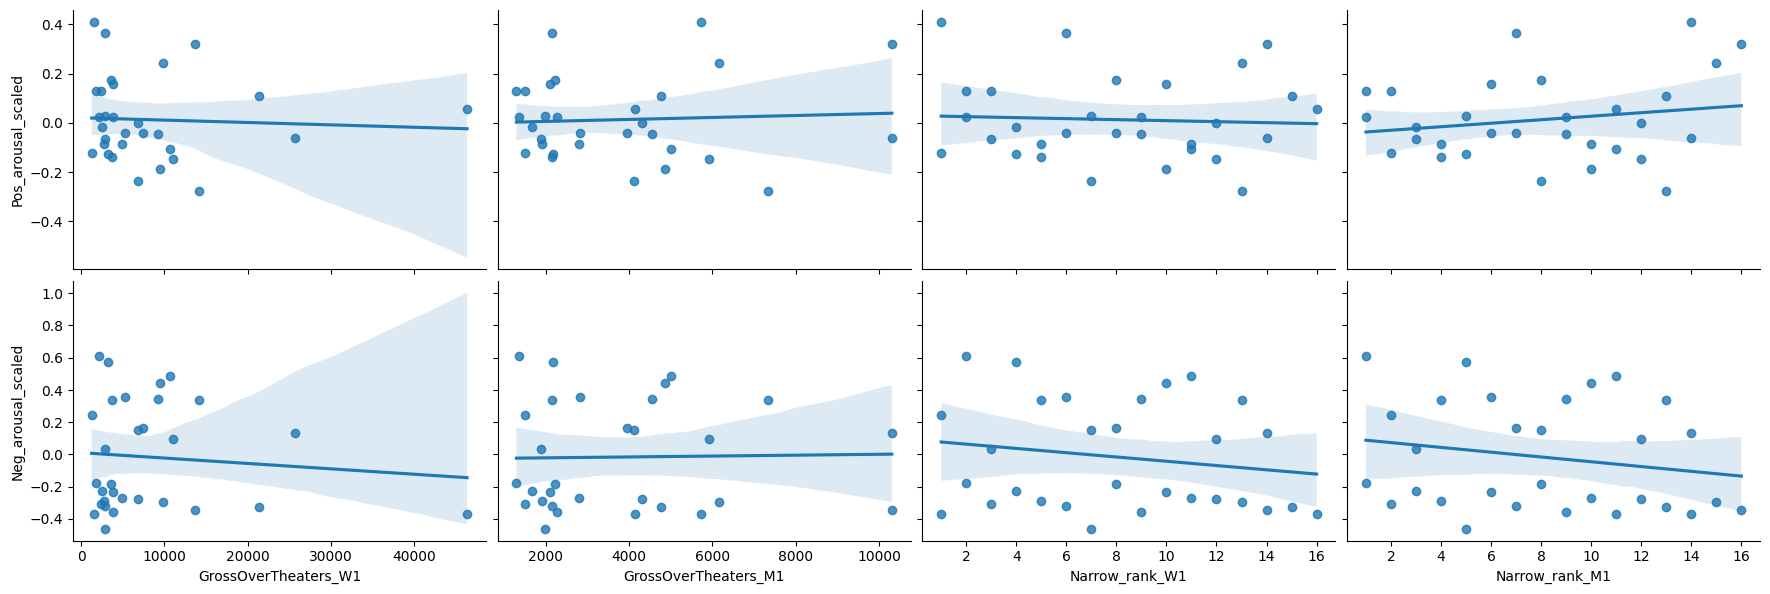

In [15]:
# Correlation between "Gross_US_W1_num" and "Gross_US_M1" and Pos_arousal and A_score and Pos_arousal for both types of trailers. 
GW_PA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_W1"], Aggregate_data_df["Pos_arousal_scaled"])
GW_NA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_W1"], Aggregate_data_df["Neg_arousal_scaled"])
GM_PA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_M1"], Aggregate_data_df["Pos_arousal_scaled"])
GM_NA_All_corr = pearsonr(Aggregate_data_df["GrossOverTheaters_M1"], Aggregate_data_df["Neg_arousal_scaled"])

RW_PA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_W1"], Aggregate_data_df["Pos_arousal_scaled"])
RW_NA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_W1"], Aggregate_data_df["Neg_arousal_scaled"])
RM_PA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_M1"], Aggregate_data_df["Pos_arousal_scaled"])
RM_NA_All_corr = pearsonr(Aggregate_data_df["Narrow_rank_M1"], Aggregate_data_df["Neg_arousal_scaled"])

print("The correlation between GrossOverTheaters_W1 and Pos_arousal is: " + str(round(GW_PA_All_corr[0], 4)) + " with a p-value of: " + str((GW_PA_All_corr[1])))
print("The correlation between GrossOverTheaters_W1 and Neg_arousal is: " + str(round(GW_NA_All_corr[0], 4)) + " with a p-value of: " + str((GW_NA_All_corr[1])))

print("\nThe correlation between GrossOverTheaters_M1 and Pos_arousal is: " + str(round(GM_PA_All_corr[0], 4)) + " with a p-value of: " + str((GM_PA_All_corr[1])))
print("The correlation between GrossOverTheaters_M1 and Neg_arousal is: " + str(round(GM_NA_All_corr[0], 4)) + " with a p-value of: " + str((GM_NA_All_corr[1])))

print("\nThe correlation between Narrow_rank_W1 and Pos_arousal is: " + str(round(RW_PA_All_corr[0], 4)) + " with a p-value of: " + str((RW_PA_All_corr[1])))
print("The correlation between Narrow_rank_W1 and Neg_arousal is: " + str(round(RW_NA_All_corr[0], 4)) + " with a p-value of: " + str((RW_NA_All_corr[1])))

print("\nThe correlation between Narrow_rank_M1 and Pos_arousal is: " + str(round(RM_PA_All_corr[0], 4)) + " with a p-value of: " + str((RM_PA_All_corr[1])))
print("The correlation between Narrow_rank_M1 and Neg_arousal is: " + str(round(RM_NA_All_corr[0], 4)) + " with a p-value of: " + str((RM_NA_All_corr[1])))

GW_GM_PA_NA_behavioral_plot = sns.pairplot(
    Aggregate_data_df,
    kind="reg",
    x_vars=["GrossOverTheaters_W1", "GrossOverTheaters_M1", "Narrow_rank_W1", "Narrow_rank_M1"],
    y_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
    palette="crest",
    height=3,
    aspect=1.5)

# Add annotation to the plot. 
GW_PA_string = "r= " + str(round(GW_PA_All_corr[0], 4)) + "; p-value: " + str((GW_PA_All_corr[1]))
GW_NA_string = "r= " + str(round(GW_NA_All_corr[0], 4)) + "; p-value: " + str((GW_NA_All_corr[1]))
GM_PA_string = "r= " + str(round(GM_PA_All_corr[0], 4)) + "; p-value: " + str((GM_PA_All_corr[1]))
GM_NA_string = "r= " + str(round(GM_NA_All_corr[0], 4)) + "; p-value: " + str((GM_NA_All_corr[1]))

#GW_GM_PA_NA_behavioral_plot.axes[0, 0].text(s=GW_PA_string, x=0, y=0, fontsize=10)
#GW_GM_PA_NA_behavioral_plot.axes[0, 1].text(s=GW_NA_string, x=0, y=0, fontsize=10)
#GW_GM_PA_NA_behavioral_plot.axes[1, 0].text(s=GM_PA_string, x=0, y=0, fontsize=10)
#GW_GM_PA_NA_behavioral_plot.axes[1, 1].text(s=GM_NA_string, x=0, y=0, fontsize=10)



In [16]:
# Correlation between "Gross_US_W1_num" and Pos_arousal and Pos_arousal for comedy trailers.
GW_PA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_W1_num"], Aggregate_data_comedy_df["Pos_arousal_scaled"])
GW_NA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_W1_num"], Aggregate_data_comedy_df["Neg_arousal_scaled"])

print("The correlation between Gross_US_W1_num and Pos_arousal for comedy trailers is: " + str(round(GW_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((GW_PA_comedy_corr[1])))
print("The correlation between Gross_US_W1_num and Neg_arousal for comedy trailers is: " + str(round(GW_NA_comedy_corr[0], 4)) + " with a p-value of: " + str((GW_NA_comedy_corr[1])))

# Correlation between Gross_US_W1_num and Pos_arousal and Pos_arousal for horror trailers.
GW_PA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_W1_num"], Aggregate_data_horror_df["Pos_arousal_scaled"])
GW_NA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_W1_num"], Aggregate_data_horror_df["Neg_arousal_scaled"])

print("\nThe correlation between Gross_US_W1_num and Pos_arousal for horror trailers is: " + str(round(GW_PA_horror_corr[0], 4)) + " with a p-value of: " + str((GW_PA_horror_corr[1])))
print("The correlation between Gross_US_W1_num and Neg_arousal for horror trailers is: " + str(round(GW_NA_horror_corr[0], 4)) + " with a p-value of: " + str((GW_NA_horror_corr[1])))

# Correlation between "Gross_US_M1" and Pos_arousal and Neg_arousal for comedy trailers.
GM_PA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_M1"], Aggregate_data_comedy_df["Pos_arousal_scaled"])
GM_NA_comedy_corr = pearsonr(Aggregate_data_comedy_df["Gross_US_M1"], Aggregate_data_comedy_df["Neg_arousal_scaled"])

print("\nThe correlation between Gross_US_M1 and Pos_arousal for comedy trailers is: " + str(round(GM_PA_comedy_corr[0], 4)) + " with a p-value of: " + str((GM_PA_comedy_corr[1])))
print("The correlation between Gross_US_M1 and Neg_arousal for comedy trailers is: " + str(round(GM_NA_comedy_corr[0], 4)) + " with a p-value of: " + str((GM_NA_comedy_corr[1])))

# Correlation between "Gross_US_M1" and Pos_arousal and Pos_arousal for horror trailers.
GM_PA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_M1"], Aggregate_data_horror_df["Pos_arousal_scaled"])
GM_NA_horror_corr = pearsonr(Aggregate_data_horror_df["Gross_US_M1"], Aggregate_data_horror_df["Neg_arousal_scaled"])

print("\nThe correlation between Gross_US_M1 and Pos_arousal for horror trailers is: " + str(round(GM_PA_horror_corr[0], 4)) + " with a p-value of: " + str((GM_PA_horror_corr[1])))
print("The correlation between Gross_US_M1 and Neg_arousal for horror trailers is: " + str(round(GM_NA_horror_corr[0], 4)) + " with a p-value of: " + str((GM_NA_horror_corr[1])))

The correlation between Gross_US_W1_num and Pos_arousal for comedy trailers is: 0.2696 with a p-value of: 0.3125523191634518
The correlation between Gross_US_W1_num and Neg_arousal for comedy trailers is: -0.0899 with a p-value of: 0.7406055042642578

The correlation between Gross_US_W1_num and Pos_arousal for horror trailers is: -0.1002 with a p-value of: 0.7333002667023019
The correlation between Gross_US_W1_num and Neg_arousal for horror trailers is: -0.2615 with a p-value of: 0.3665485931586056

The correlation between Gross_US_M1 and Pos_arousal for comedy trailers is: 0.5264 with a p-value of: 0.03618393334985086
The correlation between Gross_US_M1 and Neg_arousal for comedy trailers is: -0.2485 with a p-value of: 0.3532858574529295

The correlation between Gross_US_M1 and Pos_arousal for horror trailers is: -0.2049 with a p-value of: 0.48235109106193286
The correlation between Gross_US_M1 and Neg_arousal for horror trailers is: -0.3292 with a p-value of: 0.2503705075462128


In [17]:

""" 



GW_GM_PA_NA_bothTrailers_behavioral_plot = sns.pairplot(
    Aggregate_data_df,
    kind="reg",
    x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],
    y_vars=["Gross_US_W1_num", "Gross_US_M1"], 
    palette="crest",
    hue="Type",
    height=4,
    aspect=1.7)

# Add annotation to the plot.
GW_comedy_PA_string = "C r= " + str(round(GW_PA_comedy_corr[0], 4)) + "; p-value: " + str((GW_PA_comedy_corr[1]))
GW_horror_PA_string = "H r= " + str(round(GW_PA_horror_corr[0], 4)) + "; p-value: " + str((GW_PA_horror_corr[1]))

GM_comedy_PA_string = "C r= " + str(round(GM_PA_comedy_corr[0], 4)) + "; p-value: " + str((GM_PA_comedy_corr[1]))
GM_horror_PA_string = "H r= " + str(round(GM_PA_horror_corr[0], 4)) + "; p-value: " + str((GM_PA_horror_corr[1]))

GW_comedy_NA_string = "C r= " + str(round(GW_NA_comedy_corr[0], 4)) + "; p-value: " + str((GW_NA_comedy_corr[1]))
GW_horror_NA_string = "H r= " + str(round(GW_NA_horror_corr[0], 4)) + "; p-value: " + str((GW_NA_horror_corr[1]))

GM_comedy_NA_string = "C r= " + str(round(GM_NA_comedy_corr[0], 4)) + "; p-value: " + str((GM_NA_comedy_corr[1]))
GM_horror_NA_string = "H r= " + str(round(GM_NA_horror_corr[0], 4)) + "; p-value: " + str((GM_NA_horror_corr[1]))

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=GW_comedy_PA_string, x=0, y=0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 0].text(s=GW_horror_PA_string, x=0, y=5000000, fontsize=10)

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=GM_comedy_NA_string, x=0, y=0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[0, 1].text(s=GM_horror_NA_string, x=0, y=5000000, fontsize=10)

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 0].text(s=GM_comedy_PA_string, x=0, y=-0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 0].text(s=GM_horror_PA_string, x=0, y=10000000, fontsize=10)

GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 1].text(s=GM_comedy_NA_string, x=0, y=0, fontsize=10)
GW_GM_PA_NA_bothTrailers_behavioral_plot.axes[1, 1].text(s=GM_horror_NA_string, x=0, y=10000000, fontsize=10)

"""




' \n\n\n\nGW_GM_PA_NA_bothTrailers_behavioral_plot = sns.pairplot(\n    Aggregate_data_df,\n    kind="reg",\n    x_vars=["Pos_arousal_scaled", "Neg_arousal_scaled"],\n    y_vars=["Gross_US_W1_num", "Gross_US_M1"], \n    palette="crest",\n    hue="Type",\n    height=4,\n    aspect=1.7)\n\n# Add annotation to the plot.\nGW_comedy_PA_string = "C r= " + str(round(GW_PA_comedy_corr[0], 4)) + "; p-value: " + str((GW_PA_comedy_corr[1]))\nGW_horror_PA_string = "H r= " + str(round(GW_PA_horror_corr[0], 4)) + "; p-value: " + str((GW_PA_horror_corr[1]))\n\nGM_comedy_PA_string = "C r= " + str(round(GM_PA_comedy_corr[0], 4)) + "; p-value: " + str((GM_PA_comedy_corr[1]))\nGM_horror_PA_string = "H r= " + str(round(GM_PA_horror_corr[0], 4)) + "; p-value: " + str((GM_PA_horror_corr[1]))\n\nGW_comedy_NA_string = "C r= " + str(round(GW_NA_comedy_corr[0], 4)) + "; p-value: " + str((GW_NA_comedy_corr[1]))\nGW_horror_NA_string = "H r= " + str(round(GW_NA_horror_corr[0], 4)) + "; p-value: " + str((GW_NA_horr

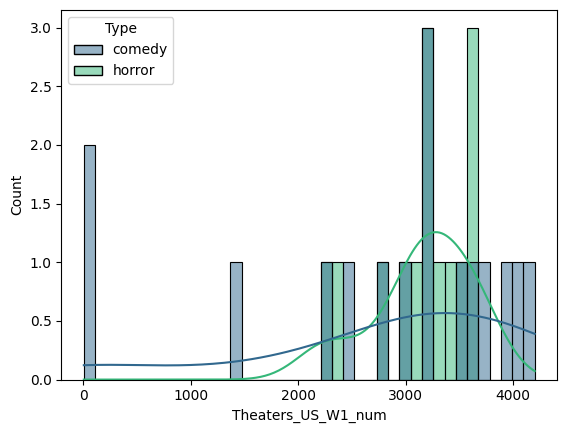

In [18]:
hist = sns.histplot(data=Aggregate_data_df, x="Theaters_US_W1_num", hue="Type", kde=True, palette="viridis", bins=40)
plt.rc('legend', title_fontsize=10, markerscale=1)




## Neural Activation Whole Average 

The correlation between NAcc_whole activation and first week gross for Comedy trailers is: 0.24671 with a p-value of: 0.3569751552111275
The correlation between AIns_whole activation and first week gross for Comedy trailers is: 0.26559 with a p-value of: 0.32012578305632283
The correlation between MPFC_whole activation and first week gross for Comedy trailers is: 0.19068 with a p-value of: 0.4793327060228273

The correlation between NAcc_whole activation and first month gross for Comedy trailers is: 0.13104 with a p-value of: 0.628564750429363
The correlation between AIns_whole activation and first month gross for Comedy trailers is: 0.30664 with a p-value of: 0.24803080383023937
The correlation between MPFC_whole activation and first month gross for Comedy trailers is: 0.08057 with a p-value of: 0.7667686897264216

The correlation between NAcc_whole activation and first week gross for Horror trailers is: -0.3079 with a p-value of: 0.2841990350870965
The correlation between AIns_whole 

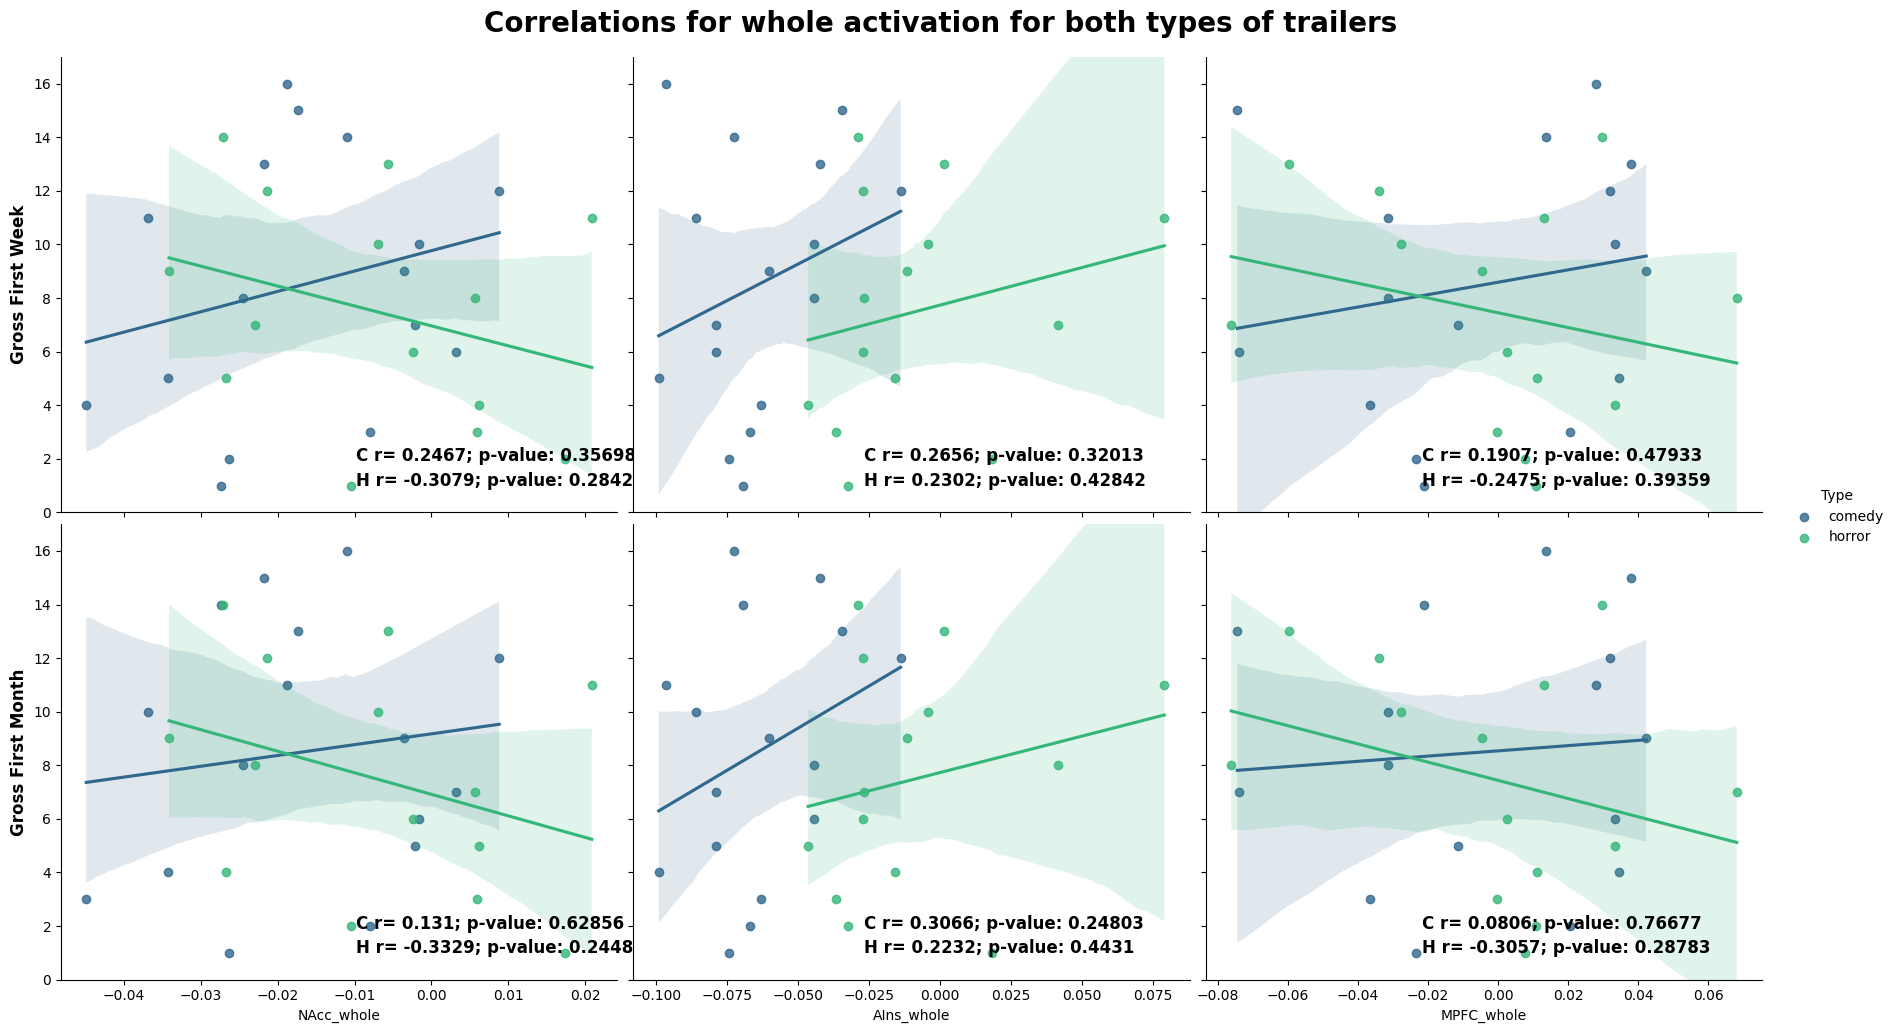

In [19]:

compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "whole", "Correlations for whole activation for both types of trailers")


## Neural Activation Offset 

In [20]:
#offset_title = "Correlations for offset activation for both types of trailers"
#compute_and_plot_corrs(all_subs_events_df, "offset", offset_title)

The correlation between NAcc_offset activation and first week gross for Comedy trailers is: -0.03946 with a p-value of: 0.8846387874155985
The correlation between AIns_offset activation and first week gross for Comedy trailers is: 0.10324 with a p-value of: 0.7035923363510924
The correlation between MPFC_offset activation and first week gross for Comedy trailers is: 0.13376 with a p-value of: 0.6213962705266164

The correlation between NAcc_offset activation and first month gross for Comedy trailers is: -0.27707 with a p-value of: 0.2988438479512201
The correlation between AIns_offset activation and first month gross for Comedy trailers is: -0.15737 with a p-value of: 0.5605304439257329
The correlation between MPFC_offset activation and first month gross for Comedy trailers is: -0.31505 with a p-value of: 0.23462350634851248

The correlation between NAcc_offset activation and first week gross for Horror trailers is: -0.04095 with a p-value of: 0.889464220236452
The correlation between 

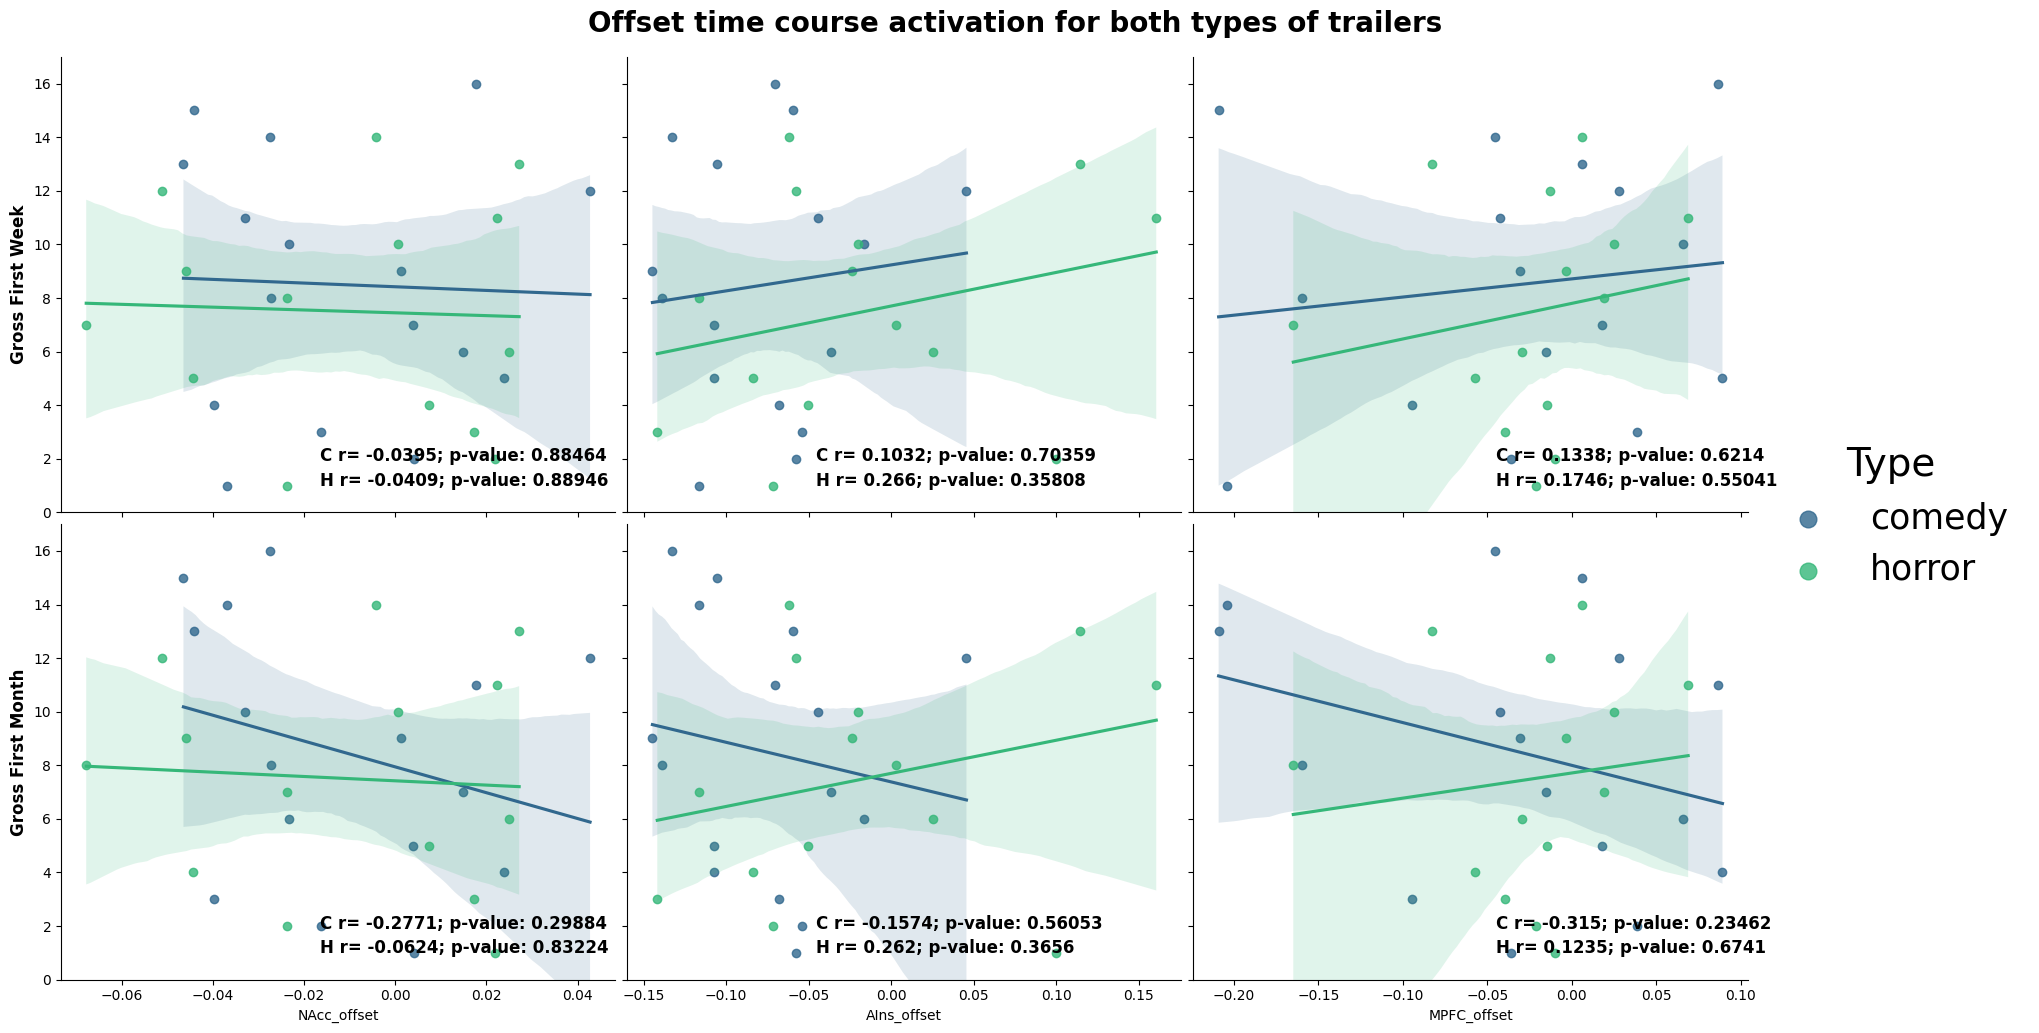

In [21]:
offset_title = 'Offset time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "offset", offset_title)


# Neural activation middle

In [22]:
#middle_title = "Correlations for middle activation for both types of trailers"
#compute_and_plot_corrs(all_subs_events_df, "middle", middle_title)

The correlation between NAcc_middle activation and first week gross for Comedy trailers is: -0.14426 with a p-value of: 0.5940078649192113
The correlation between AIns_middle activation and first week gross for Comedy trailers is: -0.06065 with a p-value of: 0.8234392325790914
The correlation between MPFC_middle activation and first week gross for Comedy trailers is: -0.07133 with a p-value of: 0.7929153703486089

The correlation between NAcc_middle activation and first month gross for Comedy trailers is: -0.32077 with a p-value of: 0.22577163646919918
The correlation between AIns_middle activation and first month gross for Comedy trailers is: 0.19957 with a p-value of: 0.458667413217154
The correlation between MPFC_middle activation and first month gross for Comedy trailers is: 0.12593 with a p-value of: 0.642128810314923

The correlation between NAcc_middle activation and first week gross for Horror trailers is: -0.16718 with a p-value of: 0.5678323442505847
The correlation between A

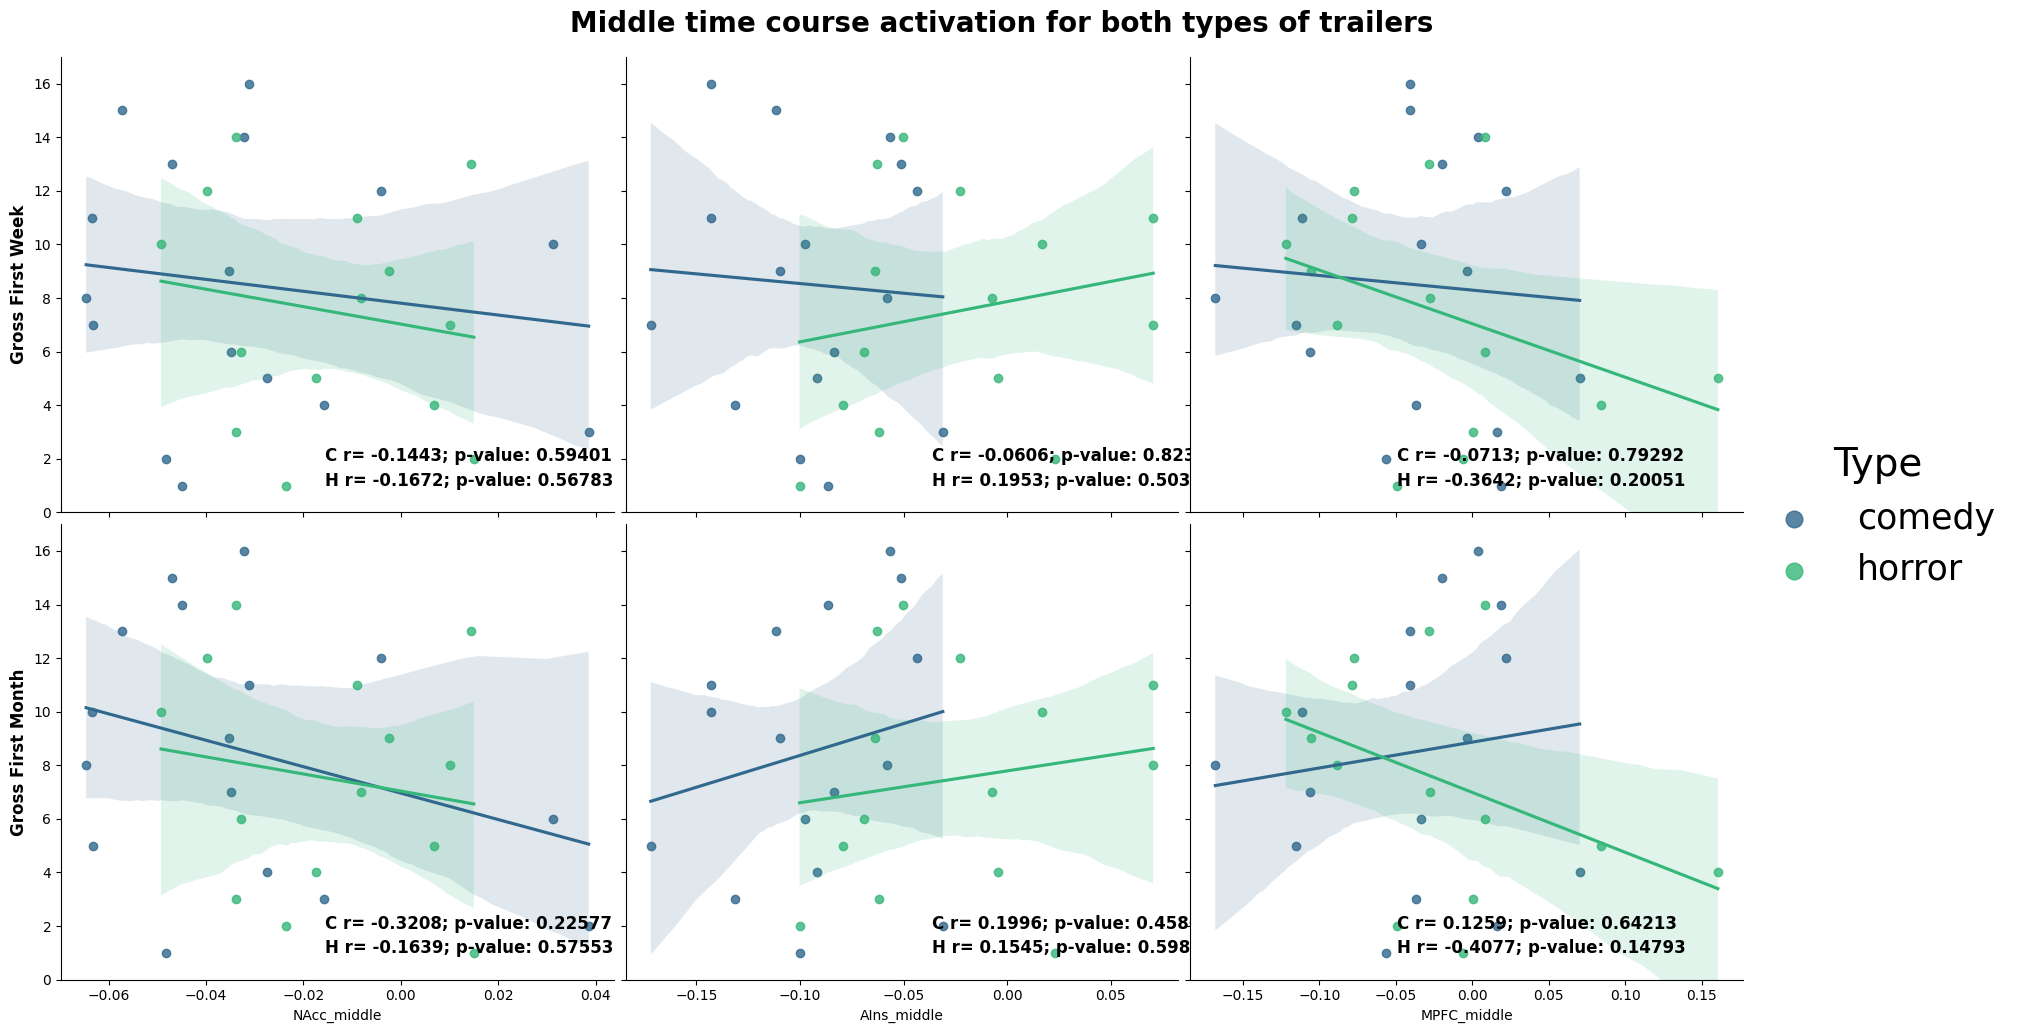

In [23]:
middle_title = 'Middle time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "middle", middle_title)

## Neural activation onset

In [24]:
#onset_title = "Correlations for onset activation for both types of trailers"
#compute_and_plot_corrs(all_subs_events_df, "onset", onset_title)

The correlation between NAcc_onset activation and first week gross for Comedy trailers is: 0.38282 with a p-value of: 0.14332474342839407
The correlation between AIns_onset activation and first week gross for Comedy trailers is: 0.23992 with a p-value of: 0.37078190485776485
The correlation between MPFC_onset activation and first week gross for Comedy trailers is: 0.1793 with a p-value of: 0.5064155618198792

The correlation between NAcc_onset activation and first month gross for Comedy trailers is: 0.53199 with a p-value of: 0.03391260745156751
The correlation between AIns_onset activation and first month gross for Comedy trailers is: 0.32666 with a p-value of: 0.21688367806000272
The correlation between MPFC_onset activation and first month gross for Comedy trailers is: 0.3915 with a p-value of: 0.1337201636318283

The correlation between NAcc_onset activation and first week gross for Horror trailers is: -0.30965 with a p-value of: 0.28132335419188903
The correlation between AIns_ons

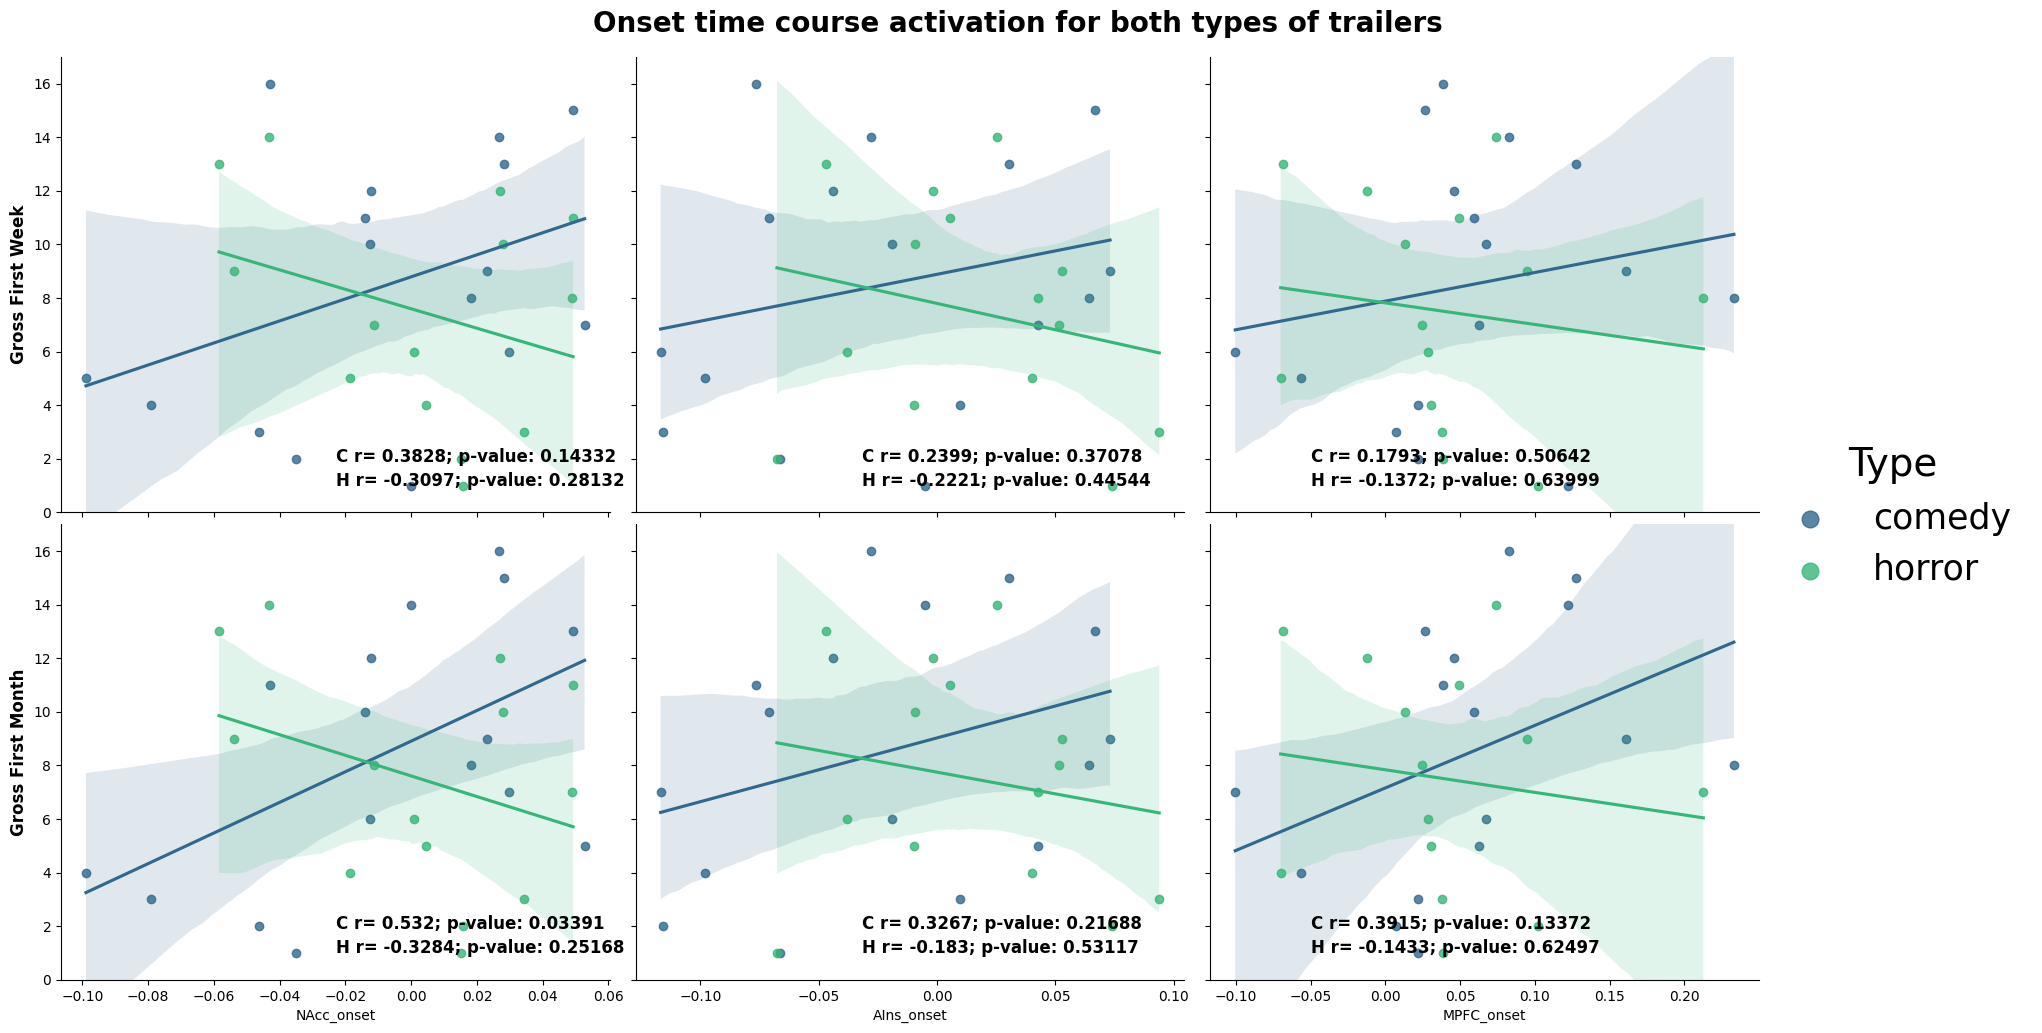

In [25]:
onset_title = 'Onset time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "onset", onset_title)

## Neural ISC

In [26]:
"""


# Correlation with Positive Arousal.
NAcc_PA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Pos_arousal_scaled"])
AIns_PA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Pos_arousal_scaled"])
MPFC_PA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Pos_arousal_scaled"])

# Correlation with Negative Arousal.
NAcc_NA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Neg_arousal_scaled"])
AIns_NA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Neg_arousal_scaled"])
MPFC_NA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Neg_arousal_scaled"])

print("For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and positive arousal is: " + str(round(AIns_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and positive arousal is: " + str(round(MPFC_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and negative arousal is: " + str(round(NAcc_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and negative arousal is: " + str(round(AIns_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and negative arousal is: " + str(round(MPFC_NA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_ISC_All_corr[1])))

print("\nFor both types of trailers, the correlation between NAcc ISC activation and watch scores is: " + str(round(NAcc_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between AIns ISC activation and watch scores is: " + str(round(AIns_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_ISC_All_corr[1])))
print("For both types of trailers, the correlation between MPFC ISC activation and watch scores is: " + str(round(MPFC_W_ISC_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_ISC_All_corr[1])))

"""

'\n\n\n# Correlation with Positive Arousal.\nNAcc_PA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Pos_arousal_scaled"])\nAIns_PA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Pos_arousal_scaled"])\nMPFC_PA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Pos_arousal_scaled"])\n\n# Correlation with Negative Arousal.\nNAcc_NA_ISC_All_corr = pearsonr(Aggregate_data_df["NAcc_ISC"], Aggregate_data_df["Neg_arousal_scaled"])\nAIns_NA_ISC_All_corr = pearsonr(Aggregate_data_df["AIns_ISC"], Aggregate_data_df["Neg_arousal_scaled"])\nMPFC_NA_ISC_All_corr = pearsonr(Aggregate_data_df["MPFC_ISC"], Aggregate_data_df["Neg_arousal_scaled"])\n\nprint("For both types of trailers, the correlation between NAcc ISC activation and positive arousal is: " + str(round(NAcc_PA_ISC_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_ISC_All_corr[1])))\nprint("For both types of trailers, the correlation between AIns ISC activati

The correlation between NAcc_ISC activation and first week gross for Comedy trailers is: 0.09441 with a p-value of: 0.7280114230788165
The correlation between AIns_ISC activation and first week gross for Comedy trailers is: 0.09764 with a p-value of: 0.7190404874643269
The correlation between MPFC_ISC activation and first week gross for Comedy trailers is: -0.15884 with a p-value of: 0.556820189598284

The correlation between NAcc_ISC activation and first month gross for Comedy trailers is: 0.11129 with a p-value of: 0.6815719581651546
The correlation between AIns_ISC activation and first month gross for Comedy trailers is: 0.00989 with a p-value of: 0.9710010818885797
The correlation between MPFC_ISC activation and first month gross for Comedy trailers is: 0.06489 with a p-value of: 0.811297284596936

The correlation between NAcc_ISC activation and first week gross for Horror trailers is: 0.58398 with a p-value of: 0.028325083945605997
The correlation between AIns_ISC activation and f

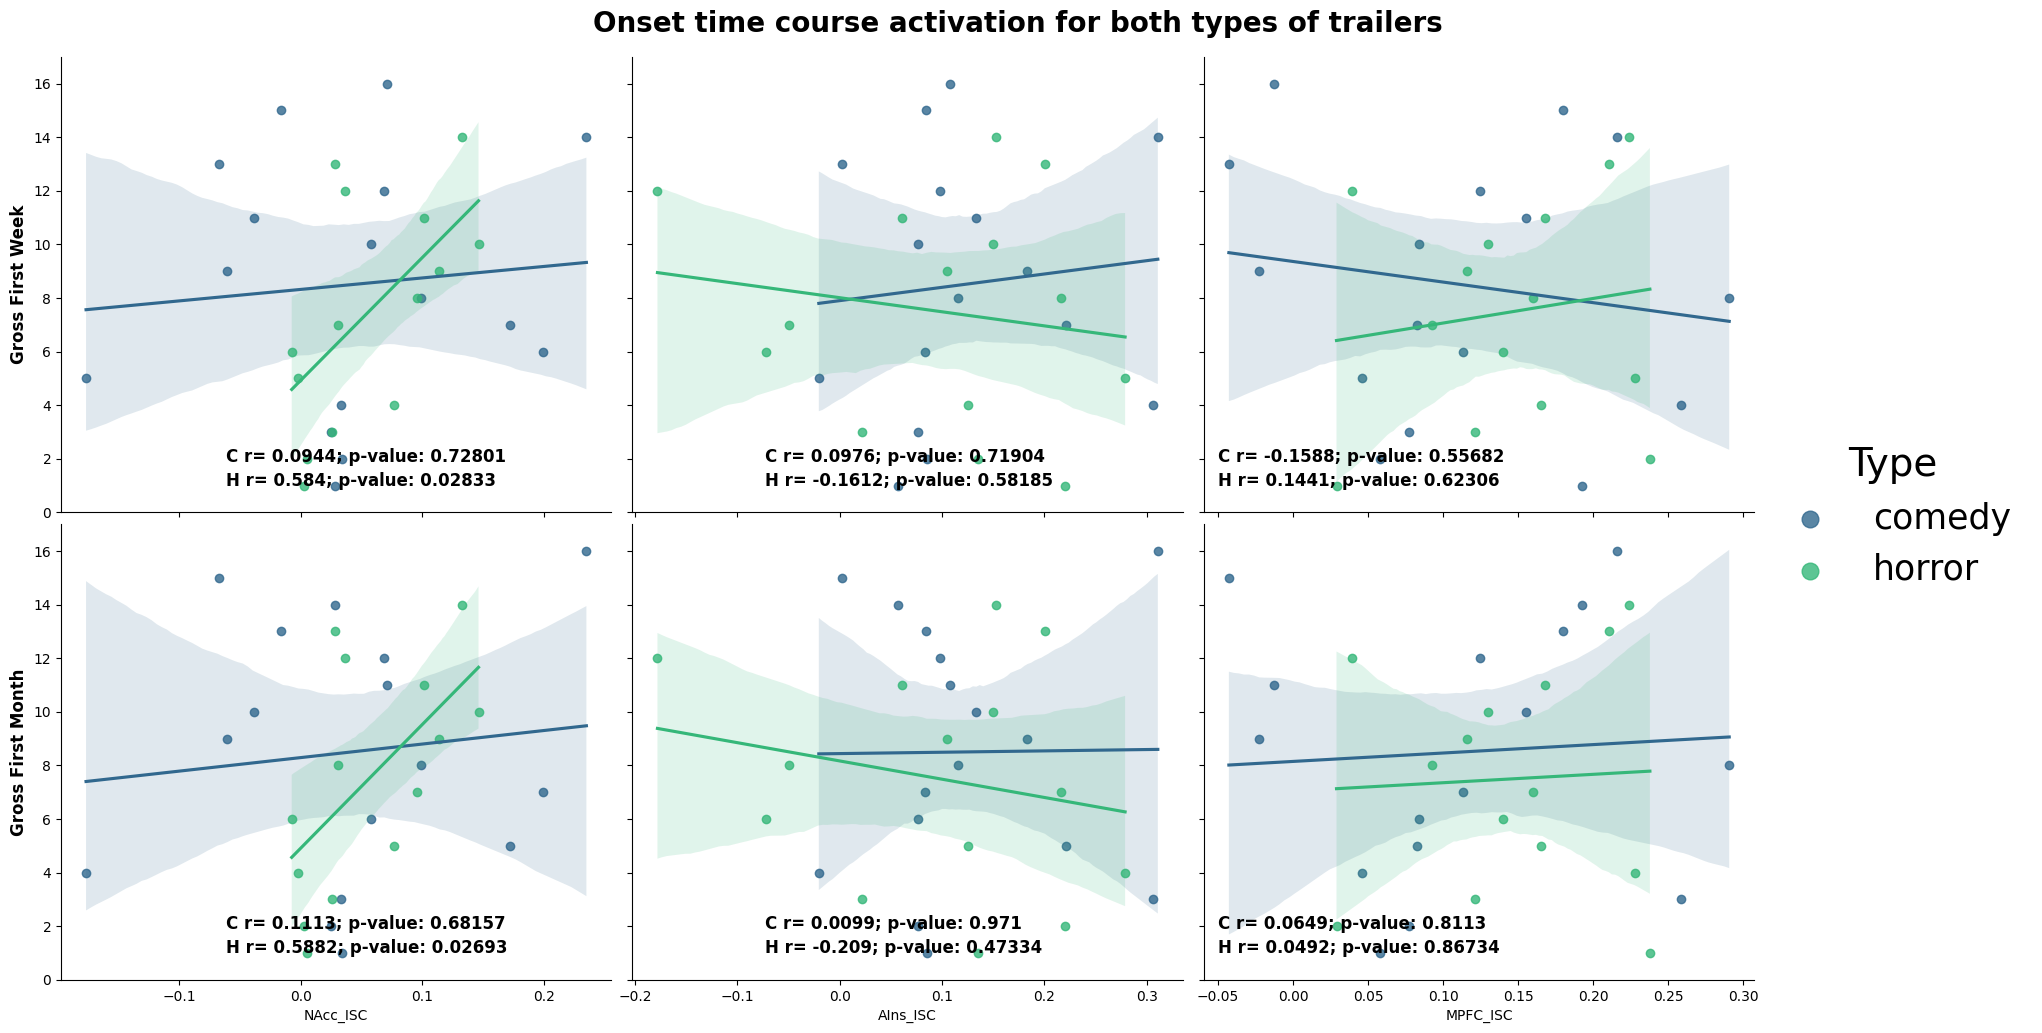

In [27]:

onset_title = 'Onset time course activation for both types of trailers'
compute_and_plot_both_corrs(Aggregate_data_df, Aggregate_data_comedy_df, Aggregate_data_horror_df, "ISC", onset_title)




# Format data for LMM analysis.

In [28]:
# Open a datasets directory. 
fd = os.open("/Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/ProcessedData", os.O_RDONLY)


# Use os.fchdir() method to change the current dir/folder.
os.fchdir(fd)

# Safe check- Print current working directory
print("Current working dir : %s" % os.getcwd())

root_path = os.getcwd()

Current working dir : /Users/luisalvarez/Documents/GitHub/RM_Thesis_Neuroforecasting/ProcessedData


In [29]:
# After dropping outliers from the neural activation data, save the new dataframe to a csv file.
# Calculate the mean measures for each trailer accross participants.
aggregate_df = all_subs_events_df.groupby("Trailer", as_index=False, dropna=False).mean()
aggregate_df.reset_index(inplace=True)

type_list = []
for id_trailer in range(len(aggregate_df)):
    if "c" in aggregate_df["Trailer"][id_trailer]:
        type_list.append("comedy")
    else:
        type_list.append("horror")

aggregate_df["Type"] = type_list

# I'm not sure why, but I am loosing the 'W_score' column. 
# I will add it back to the dataframe.
w_scores_dict = {}
for trailer_id in all_subs_events_df["Trailer"].unique():
    current_trailer_mean_w_score = all_subs_events_df[all_subs_events_df["Trailer"] == trailer_id]["W_score"].mean()
    w_scores_dict[trailer_id] = current_trailer_mean_w_score
    # Print scores as a sanity check.
    #print("For current trailer: " + trailer_id + " the mean W_score is: " + str(current_trailer_mean_w_score))

w_scores_list = []
for trailer_id in aggregate_df["Trailer"].unique():
    w_scores_list.append(w_scores_dict[trailer_id])

aggregate_df["W_score"] = w_scores_list


# Re-order columns.
cols_ordered = ['Trailer', 'Type', 'Onset', 'Offset', 'Pos_arousal', 'Neg_arousal',
        'Pos_arousal_scaled', 'Neg_arousal_scaled', 'W_score', 'W_score_scaled',
        'NAcc_onset', 'AIns_onset', 'MPFC_onset',
        'NAcc_middle', 'AIns_middle', 'MPFC_middle', 'NAcc_offset',
        'AIns_offset', 'MPFC_offset', 
        'NAcc_onset_z', 'AIns_onset_z', 'MPFC_onset_z', 'NAcc_middle_z',
        'AIns_middle_z', 'MPFC_middle_z', 'NAcc_offset_z', 'AIns_offset_z',
        'MPFC_offset_z', 'NAcc_whole', 'AIns_whole', 'MPFC_whole',
        'NAcc_whole_z', 'AIns_whole_z', 'MPFC_whole_z', 'NAcc_pos_peak',
        'AIns_pos_peak', 'MPFC_pos_peak', 'NAcc_neg_peak', 'AIns_neg_peak',
        'MPFC_neg_peak', 'NAcc_slope_peak', 'AIns_slope_peak',
        'MPFC_slope_peak', 'NAcc_slope_peak_avg', 'AIns_slope_peak_avg',
        'MPFC_slope_peak_avg', 
        #'NAcc_narrow_slope_peak',
        #'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
        #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg',
        #'MPFC_narrow_slope_peak_avg', 
        'NAcc_delta_peak', 'AIns_delta_peak',
        'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg',
        'MPFC_delta_peak_avg', 
        #'NAcc_narrow_delta_peak',
        #'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
        #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg',
        #'MPFC_narrow_delta_peak_avg', 
        'NAcc_ISC', 'AIns_ISC', 'MPFC_ISC',]

aggregate_df = aggregate_df[cols_ordered]

root_path = os.getcwd()

#aggregate_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_clean.csv", index=True)
aggregate_df.head(40)

NameError: name 'all_subs_events_df' is not defined

In [ ]:
# # Read aggregate metrics dataframe. 
# aggregate_metricts_path = "/Users/luisalvarez/Documents/SpanLab/Aggregate_metrics_labeled.csv"

# aggregate_metrics_df = pd.read_csv(aggregate_metricts_path)

# # Remove nan.
# aggregate_metrics_df.dropna(subset=['label'], inplace=True)
# aggregate_metrics_df.reset_index(inplace=True)
# aggregate_metrics_df

,index,number,title,label,year,Release time,genre,"released (1 = yes, 0 = no)",url to trailer,Domestic Gross,...,Total_weeks,Weeks_avg_per_theater,Gross_World_num,downloaded,video trimmed,audio extracted,Budget,Unnamed: 33,Unnamed: 34,"The tool used to get the thumbnail: https://youtu.be/otNh9bTjXWg?si=NJaRcikG3tZUpNBl , size of thumbnail 640*480"
0,0,1,Joy Ride,rc1,2023,July 7,comedy,1,https://youtu.be/jyI-AM5VXDo?si=mZtAKMiPG0Ac2myk,12897789.0,...,4.0,2.0,15518636.0,NaN,NaN,NaN,NaN,NaN,NaN,"The pilot data collected by prolific, sample s..."
1,1,2,80 For Brady,rc2,2023,Feb 3,comedy,1,https://youtu.be/-UeGXB2NjR8?si=JU3SbpBjbO05o2xl,39330588.0,...,7.0,4.0,40384027.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,A Man Called Otto,rc3,2022,Dec 30,comedy,1,https://youtu.be/eFYUX9l-m5I,64267657.0,...,15.0,6.0,108641148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,Puss in Boots: The Last Wish,rc4,2022,Dec 21,comedy,1,https://youtu.be/RqrXhwS33yc?si=jhP7bbiB2SUukjNb,185535345.0,...,18.0,11.0,485252376.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Strays,rc5,2023,Aug 18,comedy,1,https://youtu.be/26Xq6_g2r6Q?si=W1w0lLc7rlqiJ8TI,23988885.0,...,6.0,4.0,35958110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,7,Champions,rc6,2023,Mar 10,comedy,1,https://youtu.be/pCHiWnj5Oek?si=3Rq4Yp7lOL2GySLb,16271910.0,...,8.0,3.0,19115227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,8,Book Club: The Next Chapter,rc7,2023,May 12,comedy,1,https://youtu.be/i9k213d5FU0?si=B8j2urRDZmCpvSOJ,17556340.0,...,6.0,3.0,29121628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,11,No Hard Feelings,rc8,2023,23-Jun,comedy,1,https://youtu.be/P15S6ND8kbQ?si=gjAiNLYLM0PQdiXv,50452282.0,...,7.0,4.0,83453541.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11,12,House Party,rc9,2023,13-Jan,comedy,1,https://youtu.be/XgOP67mTgZg?si=r135es4jieCvHxg7,9002247.0,...,6.0,3.0,9213735.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16,17,Easter Sunday,rc10,2022,5-Aug,comedy,1,https://youtu.be/YIixb42aJPg?si=W_YbI5jjV8SOzHAJ,13013690.0,...,7.0,3.0,13021859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Join both dataframes.
# aggregate_combined_df = aggregate_df.set_index('Trailer').join(aggregate_metrics_df.set_index('label'))

# aggregate_combined_df.dropna(subset=['Gross_World_num'], inplace=True)
# aggregate_combined_df.reset_index(inplace=True)

# aggregate_combined_col = aggregate_combined_df.columns

# print("The shape of the combined dataframe is: ", aggregate_combined_df.shape)

# # Drop columns that are not needed.
# aggregate_combined_df.drop(columns=["Onset", "Offset", 'NAcc_pos_peak',
#        'AIns_pos_peak', 'MPFC_pos_peak', 'NAcc_neg_peak', 'AIns_neg_peak',
#        'MPFC_neg_peak', 'NAcc_slope_peak', 'AIns_slope_peak',
#        'MPFC_slope_peak', 'NAcc_slope_peak_avg', 'AIns_slope_peak_avg',
#        'MPFC_slope_peak_avg', 
#        #'NAcc_narrow_slope_peak', 'AIns_narrow_slope_peak', 'MPFC_narrow_slope_peak',
#        #'NAcc_narrow_slope_peak_avg', 'AIns_narrow_slope_peak_avg', 'MPFC_narrow_slope_peak_avg', 
#        'NAcc_delta_peak', 'AIns_delta_peak',
#        'MPFC_delta_peak', 'NAcc_delta_peak_avg', 'AIns_delta_peak_avg',
#        'MPFC_delta_peak_avg', 
#        #'NAcc_narrow_delta_peak', 'AIns_narrow_delta_peak', 'MPFC_narrow_delta_peak',
#        #'NAcc_narrow_delta_peak_avg', 'AIns_narrow_delta_peak_avg', 'MPFC_narrow_delta_peak_avg', 
#        'year', 'Release time', 'genre',
#        'released (1 = yes, 0 = no)', 'url to trailer', 'Unnamed: 33', 'Unnamed: 34',
#        'The tool used to get the thumbnail: https://youtu.be/otNh9bTjXWg?si=NJaRcikG3tZUpNBl , size of thumbnail 640*480',
#        'downloaded', 'video trimmed', 'audio extracted', 'Budget'], inplace=True) 

# print("After dropping columns, the shape of the combined dataframe is: ", aggregate_combined_df.shape)

# # Calculate first month gross for US.
# aggregate_combined_df["Gross_US_M1"] = aggregate_combined_df["Gross_US_W4_num"] 
# aggregate_combined_df["Theaters_US_M1"] = aggregate_combined_df["Theaters_US_W1_num"] + aggregate_combined_df["Theaters_US_W2_num"] + aggregate_combined_df["Theaters_US_W3_num"] + aggregate_combined_df["Theaters_US_W4_num"]

# # Save the new dataframe to a csv file.
# aggregate_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
# aggregate_comedy_df.reset_index(drop=True, inplace=True)
# aggregate_comedy_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_comedy.csv", index=True)

# # Save the new dataframe to a csv file.
# aggregate_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
# aggregate_horror_df.reset_index(drop=True, inplace=True)
# aggregate_horror_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_horror.csv", index=True)

# aggregate_combined_df.head(30)


The shape of the combined dataframe is:  (30, 91)
After dropping columns, the shape of the combined dataframe is:  (30, 59)


,Trailer,Type,Pos_arousal,Neg_arousal,Pos_arousal_scaled,Neg_arousal_scaled,W_score,W_score_scaled,NAcc_onset,AIns_onset,...,Theaters_US_W3_num,Gross_US_W4_num,Theaters_US_W4_num,Gross_Total_US,Total_Theaters_US,Total_weeks,Weeks_avg_per_theater,Gross_World_num,Gross_US_M1,Theaters_US_M1
0,rc1,comedy,1.778694,-0.320190,0.364480,-0.320190,3.107143,0.866071,0.029611,-0.116781,...,335.0,12897789.0,66.0,12897789.0,6041.0,4.0,2.0,15518636.0,12897789.0,6041.0
1,rc10,comedy,1.543847,-0.304939,0.129634,-0.304939,2.481481,0.229167,-0.046373,-0.115710,...,1574.0,12660865.0,553.0,13013690.0,9026.0,7.0,3.0,13021859.0,12660865.0,8478.0
2,rc11,comedy,1.445893,-0.352791,0.031680,-0.352791,2.034483,-0.271552,0.033443,0.075872,...,3078.0,26897765.0,1474.0,28496030.0,13576.0,7.0,4.0,39126983.0,26897765.0,11880.0
3,rc12,comedy,1.321989,-0.270341,-0.092224,-0.270341,1.857143,-0.468750,-0.098948,-0.105218,...,960.0,11681574.0,273.0,12089391.0,6570.0,7.0,3.0,17657217.0,11681574.0,6161.0
4,rc2,comedy,1.328290,-0.268451,-0.085923,-0.268451,1.896552,-0.409483,-0.014134,-0.070817,...,3119.0,37473383.0,2397.0,39448525.0,15397.0,7.0,4.0,40384027.0,37473383.0,13367.0
5,rc3,comedy,1.523302,-0.324938,0.109088,-0.324938,2.740741,0.495370,0.049353,0.066683,...,3802.0,39302864.0,3802.0,64267657.0,24008.0,15.0,6.0,108641148.0,39302864.0,8245.0
6,rc4,comedy,1.825153,-0.369021,0.410939,-0.369021,3.250000,1.008929,-0.000217,-0.005031,...,4121.0,92969975.0,3919.0,186090535.0,47972.0,18.0,11.0,485252376.0,92969975.0,16232.0
7,rc5,comedy,1.587900,-0.183105,0.173686,-0.183105,2.571429,0.276786,0.018259,0.064336,...,2486.0,23236435.0,1500.0,23988885.0,11576.0,6.0,4.0,35958110.0,23236435.0,10441.0
8,rc6,comedy,1.399011,-0.224754,-0.015202,-0.224754,2.310345,0.004310,-0.079126,0.009850,...,1917.0,15199130.0,1121.0,16397335.0,9913.0,8.0,3.0,19115227.0,15199130.0,9107.0
9,rc7,comedy,1.443221,-0.461644,0.029007,-0.461644,2.142857,-0.098214,0.052734,0.042732,...,1339.0,17274770.0,382.0,17581565.0,9079.0,6.0,3.0,29121628.0,17274770.0,8742.0


In [ ]:
# aggregate_combined_df.to_csv(root_path + "/AllSubs_NeuralActivation_Aggregate_Combined_clean.csv", index=False)

# # Separate files based on type of trailer. 
# aggregate_combined_horror_df = aggregate_combined_df[aggregate_combined_df["Type"] == "horror"]
# aggregate_combined_horror_df.reset_index(drop=True, inplace=True)
# aggregate_combined_horror_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Horror_clean.csv')

# aggregate_combined_comedy_df = aggregate_combined_df[aggregate_combined_df["Type"] == "comedy"]
# aggregate_combined_comedy_df.reset_index(drop=True, inplace=True)
# aggregate_combined_comedy_df.to_csv(root_path +'/AllSubs_NeuralActivation_Aggregate_Combined_Comedy_clean.csv')

# #aggregate_combined_df.head(40)
# aggregate_combined_comedy_df.head()

,Trailer,Type,Pos_arousal,Neg_arousal,Pos_arousal_scaled,Neg_arousal_scaled,W_score,W_score_scaled,NAcc_onset,AIns_onset,...,Theaters_US_W3_num,Gross_US_W4_num,Theaters_US_W4_num,Gross_Total_US,Total_Theaters_US,Total_weeks,Weeks_avg_per_theater,Gross_World_num,Gross_US_M1,Theaters_US_M1
0,rc1,comedy,1.778694,-0.320190,0.364480,-0.320190,3.107143,0.866071,0.029611,-0.116781,...,335.0,12897789.0,66.0,12897789.0,6041.0,4.0,2.0,15518636.0,12897789.0,6041.0
1,rc10,comedy,1.543847,-0.304939,0.129634,-0.304939,2.481481,0.229167,-0.046373,-0.115710,...,1574.0,12660865.0,553.0,13013690.0,9026.0,7.0,3.0,13021859.0,12660865.0,8478.0
2,rc11,comedy,1.445893,-0.352791,0.031680,-0.352791,2.034483,-0.271552,0.033443,0.075872,...,3078.0,26897765.0,1474.0,28496030.0,13576.0,7.0,4.0,39126983.0,26897765.0,11880.0
3,rc12,comedy,1.321989,-0.270341,-0.092224,-0.270341,1.857143,-0.468750,-0.098948,-0.105218,...,960.0,11681574.0,273.0,12089391.0,6570.0,7.0,3.0,17657217.0,11681574.0,6161.0
4,rc2,comedy,1.328290,-0.268451,-0.085923,-0.268451,1.896552,-0.409483,-0.014134,-0.070817,...,3119.0,37473383.0,2397.0,39448525.0,15397.0,7.0,4.0,40384027.0,37473383.0,13367.0


In [ ]:
# aggregate_combined_comedy_df.head()

,Trailer,Type,Pos_arousal,Neg_arousal,Pos_arousal_scaled,Neg_arousal_scaled,W_score,W_score_scaled,NAcc_onset,AIns_onset,...,Theaters_US_W3_num,Gross_US_W4_num,Theaters_US_W4_num,Gross_Total_US,Total_Theaters_US,Total_weeks,Weeks_avg_per_theater,Gross_World_num,Gross_US_M1,Theaters_US_M1
0,rc1,comedy,1.778694,-0.320190,0.364480,-0.320190,3.107143,0.866071,0.029611,-0.116781,...,335.0,12897789.0,66.0,12897789.0,6041.0,4.0,2.0,15518636.0,12897789.0,6041.0
1,rc10,comedy,1.543847,-0.304939,0.129634,-0.304939,2.481481,0.229167,-0.046373,-0.115710,...,1574.0,12660865.0,553.0,13013690.0,9026.0,7.0,3.0,13021859.0,12660865.0,8478.0
2,rc11,comedy,1.445893,-0.352791,0.031680,-0.352791,2.034483,-0.271552,0.033443,0.075872,...,3078.0,26897765.0,1474.0,28496030.0,13576.0,7.0,4.0,39126983.0,26897765.0,11880.0
3,rc12,comedy,1.321989,-0.270341,-0.092224,-0.270341,1.857143,-0.468750,-0.098948,-0.105218,...,960.0,11681574.0,273.0,12089391.0,6570.0,7.0,3.0,17657217.0,11681574.0,6161.0
4,rc2,comedy,1.328290,-0.268451,-0.085923,-0.268451,1.896552,-0.409483,-0.014134,-0.070817,...,3119.0,37473383.0,2397.0,39448525.0,15397.0,7.0,4.0,40384027.0,37473383.0,13367.0


In [ ]:

"""
# # Correlation with Positive Arousal.
# NAcc_PA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Pos_arousal_scaled"])
# AIns_PA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Pos_arousal_scaled"])
# MPFC_PA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Pos_arousal_scaled"])

# # Correlation with Negative Arousal.
# NAcc_NA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Neg_arousal_scaled"])
# AIns_NA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Neg_arousal_scaled"])
# MPFC_NA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Neg_arousal_scaled"])

# # Correlation with Watch Scores.
# NAcc_W_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["W_score_scaled"])
# AIns_W_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["W_score_scaled"])
# MPFC_W_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["W_score_scaled"])

# print("For both types of trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_All_corr[1])))
# print("For both types of trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_All_corr[1])))
# print("For both types of trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_All_corr[1])))

# print("\nFor both types of trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_All_corr[1])))
# print("For both types of trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_All_corr[1])))
# print("For both types of trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_All_corr[1])))

# print("\nFor both types of trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_All_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_All_corr[1])))
# print("For both types of trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_All_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_All_corr[1])))
# print("For both types of trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_All_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_All_corr[1])))

# On_all_corr = [NAcc_PA_On_All_corr, NAcc_NA_On_All_corr, NAcc_W_On_All_corr, AIns_PA_On_All_corr, AIns_NA_On_All_corr, AIns_W_On_All_corr, MPFC_PA_On_All_corr, MPFC_NA_On_All_corr, MPFC_W_On_All_corr]
# plot_correlations(all_subs_events_df, On_all_corr, "onset", "Correlations for onset activation for both types of trailers")

# # Onset Neural Activation and PA-NA for Comedy Trailers.
# NAcc_PA_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["Pos_arousal_scaled"])
# AIns_PA_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["Pos_arousal_scaled"])
# MPFC_PA_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["Pos_arousal_scaled"])

# NAcc_NA_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["Neg_arousal_scaled"])
# AIns_NA_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["Neg_arousal_scaled"])
# MPFC_NA_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["Neg_arousal_scaled"])

# NAcc_W_On_C_corr = pearsonr(all_subs_events_comedy["NAcc_onset"], all_subs_events_comedy["W_score_scaled"])
# AIns_W_On_C_corr = pearsonr(all_subs_events_comedy["AIns_onset"], all_subs_events_comedy["W_score_scaled"])
# MPFC_W_On_C_corr = pearsonr(all_subs_events_comedy["MPFC_onset"], all_subs_events_comedy["W_score_scaled"])

# print("For comedy trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_C_corr[1])))
# print("For comedy trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_C_corr[1])))
# print("For comedy trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_C_corr[1])))

# print("\nFor comedy trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_C_corr[1])))
# print("For comedy trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_C_corr[1])))
# print("For comedy trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_C_corr[1])))

# print("\nFor comedy trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_C_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_C_corr[1])))
# print("For comedy trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_C_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_C_corr[1])))
# print("For comedy trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_C_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_C_corr[1])))

# # Onset Neural Activation and PA-NA for Horror Trailers.
# NAcc_PA_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["Pos_arousal_scaled"])
# AIns_PA_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["Pos_arousal_scaled"])
# MPFC_PA_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["Pos_arousal_scaled"])

# NAcc_NA_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["Neg_arousal_scaled"])
# AIns_NA_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["Neg_arousal_scaled"])
# MPFC_NA_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["Neg_arousal_scaled"])

# NAcc_W_On_H_corr = pearsonr(all_subs_events_horror["NAcc_onset"], all_subs_events_horror["W_score_scaled"])
# AIns_W_On_H_corr = pearsonr(all_subs_events_horror["AIns_onset"], all_subs_events_horror["W_score_scaled"])
# MPFC_W_On_H_corr = pearsonr(all_subs_events_horror["MPFC_onset"], all_subs_events_horror["W_score_scaled"])

# print("For horror trailers, the correlation between NAcc onset activation and positive arousal is: " + str(round(NAcc_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_PA_On_H_corr[1])))
# print("For horror trailers, the correlation between AIns onset activation and positive arousal is: " + str(round(AIns_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_PA_On_H_corr[1])))
# print("For horror trailers, the correlation between MPFC onset activation and positive arousal is: " + str(round(MPFC_PA_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_PA_On_H_corr[1])))

# print("\nFor horror trailers, the correlation between NAcc onset activation and negative arousal is: " + str(round(NAcc_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_NA_On_H_corr[1])))
# print("For horror trailers, the correlation between AIns onset activation and negative arousal is: " + str(round(AIns_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_NA_On_H_corr[1])))
# print("For horror trailers, the correlation between MPFC onset activation and negative arousal is: " + str(round(MPFC_NA_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_NA_On_H_corr[1])))

# print("\nFor horror trailers, the correlation between NAcc onset activation and watch scores is: " + str(round(NAcc_W_On_H_corr[0], 5)) + " with a p-value of: " + str((NAcc_W_On_H_corr[1])))
# print("For horror trailers, the correlation between AIns onset activation and watch scores is: " + str(round(AIns_W_On_H_corr[0], 5)) + " with a p-value of: " + str((AIns_W_On_H_corr[1])))
# print("For horror trailers, the correlation between MPFC onset activation and watch scores is: " + str(round(MPFC_W_On_H_corr[0], 5)) + " with a p-value of: " + str((MPFC_W_On_H_corr[1])))

# On_horror_corr = [NAcc_PA_On_H_corr, NAcc_NA_On_H_corr, NAcc_W_On_H_corr, AIns_PA_On_H_corr, AIns_NA_On_H_corr, AIns_W_On_H_corr, MPFC_PA_On_H_corr, MPFC_NA_On_H_corr, MPFC_W_On_H_corr]
# On_comedy_corr = [NAcc_PA_On_C_corr, NAcc_NA_On_C_corr, NAcc_W_On_C_corr, AIns_PA_On_C_corr, AIns_NA_On_C_corr, AIns_W_On_C_corr, MPFC_PA_On_C_corr, MPFC_NA_On_C_corr, MPFC_W_On_C_corr]
# plot_correlations3_bothTrailers(all_subs_events_df, "onset", On_comedy_corr, On_horror_corr, "Correlations for onset activation for both types of trailers")



"""


'\n# # Correlation with Positive Arousal.\n# NAcc_PA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Pos_arousal_scaled"])\n# AIns_PA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Pos_arousal_scaled"])\n# MPFC_PA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Pos_arousal_scaled"])\n\n# # Correlation with Negative Arousal.\n# NAcc_NA_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["Neg_arousal_scaled"])\n# AIns_NA_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["Neg_arousal_scaled"])\n# MPFC_NA_On_All_corr = pearsonr(all_subs_events_df["MPFC_onset"], all_subs_events_df["Neg_arousal_scaled"])\n\n# # Correlation with Watch Scores.\n# NAcc_W_On_All_corr = pearsonr(all_subs_events_df["NAcc_onset"], all_subs_events_df["W_score_scaled"])\n# AIns_W_On_All_corr = pearsonr(all_subs_events_df["AIns_onset"], all_subs_events_df["W_score_scaled"])\n# MPFC_